## Objective

Create a model that will assist brokerage firms in coming up woth accurate insights on Residential homes on a national level.

### Imports

In [60]:
# import packages

import numpy as np
import pandas as pd, datetime
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import seasonal_decompose;
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data and set index

df =pd.read_csv("redfin_housing_data.csv")
df.index.name = 'Index'

In [3]:
df.head()

,Unnamed: 0,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,City,last_updated,Measure Display,...,Period Duration,Price Drops,Price Drops Mom,Price Drops Yoy,property_type_id,region_type_id,Sold Above List,Sold Above List Mom,Sold Above List Yoy,Geo Region
Index,,,,,,,,,,,,,,,,,,,,,
0,38310,"Orlando, FL metro area",February 2012,All Residential,Metro,False,FL,NaN,8/9/2020 2:51:18 PM,NaN,...,30,NaN,NaN,NaN,-1,-2,0.217514,-0.006194,-0.053184,South
1,13134,"Vineyard Haven, MA metro area",February 2012,All Residential,Metro,False,MA,NaN,8/9/2020 2:51:18 PM,NaN,...,30,NaN,NaN,NaN,-1,-2,0.200000,-0.022222,0.075000,Northeast
2,10196,"Poughkeepsie, NY metro area",February 2012,All Residential,Metro,False,NY,NaN,8/9/2020 2:51:18 PM,NaN,...,30,NaN,NaN,NaN,-1,-2,0.072917,-0.021528,-0.048443,Northeast
3,7325,"Harrisburg, PA metro area",February 2012,All Residential,Metro,False,PA,NaN,8/9/2020 2:51:18 PM,NaN,...,30,NaN,NaN,NaN,-1,-2,0.123919,0.011740,0.003114,Northeast
4,7326,"Montgomery County, PA metro area",February 2012,All Residential,Metro,False,PA,NaN,8/9/2020 2:51:18 PM,NaN,...,30,0.00649,0.005338,0.006394,-1,-2,0.088442,0.016754,-0.023290,Northeast


In [4]:
# Number of columns and rows

df.shape

(40677, 67)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40677 entries, 0 to 40676
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      40677 non-null  int64  
 1   Region                          40677 non-null  object 
 2   Month of Period End             40677 non-null  object 
 3   Property Type                   40677 non-null  object 
 4   Region Type                     40677 non-null  object 
 5   Seasonally Adjusted             40677 non-null  bool   
 6   State Code                      40677 non-null  object 
 7   City                            0 non-null      float64
 8   last_updated                    40677 non-null  object 
 9   Measure Display                 0 non-null      float64
 10  parent_metro_region             40677 non-null  object 
 11  Period Begin                    40677 non-null  object 
 12  Period End                      

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,40677.0,20338.539002,11743.204079,0.000000,10169.000000,20338.000000,30508.000000,4.067800e+04
City,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Measure Display,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Table Id,40677.0,29771.431423,11647.554072,10140.000000,19430.000000,30280.000000,40080.000000,4.966000e+04
active_listings,40643.0,3107.810718,5828.057279,1.000000,257.000000,680.000000,3161.000000,5.126200e+04
active_listings_mom,40283.0,0.021887,1.663480,-0.973214,-0.043889,-0.000352,0.042975,2.718182e+02
active_listings_yoy,39492.0,0.299848,14.097522,-0.993852,-0.119702,-0.036310,0.055966,1.499500e+03
Avg Sale To List,40408.0,0.962160,0.030806,0.500000,0.949031,0.966085,0.979934,1.384615e+00
Homes Sold,40608.0,644.834909,1260.629069,1.000000,39.000000,118.000000,633.000000,1.218100e+04


In [7]:
#Percentage of missing data in each column

missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns = ['count', '%']

In [8]:
# name columns and sort by most to least amount of missing data

missing = missing.sort_values(by=['count', '%'], ascending=False)

In [9]:
missing.head(10)

,count,%
City,40677,100.000000
Measure Display,40677,100.000000
State,40677,100.000000
Price Drops Yoy,15829,38.913883
Price Drops Mom,12529,30.801190
Price Drops,11731,28.839393
off_market_in_two_weeks_yoy,2040,5.015119
pending_sales_yoy,2040,5.015119
Median Dom Yoy,1701,4.181724
New Listings Yoy,1598,3.928510


Features `State`, `Measure Display`, `City`, `Price Drops Yoy`, `Price Drops Mom`, 
`Price Drops` have 20% or more of missing data. With such a significant amount of missing information, these columns can be dropped. As well as other columns that upon inspection serve no value.

In [10]:
drop_cols = ['Price Drops', 'Measure Display','City', 'Price Drops Yoy', 'Price Drops Mom', 
             'State', 'Seasonally Adjusted','Property Type', 'Region Type', 'Number of Records', 
             'property_type_id', 'Period Duration', 'region_type_id', 'Unnamed: 0']

In [11]:
df = df.drop(drop_cols, axis=1)

In [12]:
df.head().T

Index,0,1,2,3,4
Region,"Orlando, FL metro area","Vineyard Haven, MA metro area","Poughkeepsie, NY metro area","Harrisburg, PA metro area","Montgomery County, PA metro area"
Month of Period End,February 2012,February 2012,February 2012,February 2012,February 2012
State Code,FL,MA,NY,PA,PA
last_updated,8/9/2020 2:51:18 PM,8/9/2020 2:51:18 PM,8/9/2020 2:51:18 PM,8/9/2020 2:51:18 PM,8/9/2020 2:51:18 PM
parent_metro_region,"Orlando, FL","Vineyard Haven, MA","Poughkeepsie, NY","Harrisburg, PA","Montgomery County, PA"
Period Begin,2/1/2012,2/1/2012,2/1/2012,2/1/2012,2/1/2012
Period End,2012-02-01,2012-02-01,2012-02-01,2012-02-01,2012-02-01
Table Id,36740,47240,39100,25420,33874
Worksheet Filter,Value,Value,Value,Value,Value
active_listings,21554.0,144.0,4059.0,3956.0,11992.0


After isolating column `Period End`, it is apparent that the data type must be changed from object to datetime.

In [13]:
df['Period End'].head()

Index
0    2012-02-01
1    2012-02-01
2    2012-02-01
3    2012-02-01
4    2012-02-01
Name: Period End, dtype: object

In [14]:
#change column to datetime 

df['Period End']=pd.to_datetime(df['Period End']).dt.normalize()

df = df.set_index('Period End')

In [15]:
df.head().T

Index,0,1,2,3,4
Region,"Orlando, FL metro area","Vineyard Haven, MA metro area","Poughkeepsie, NY metro area","Harrisburg, PA metro area","Montgomery County, PA metro area"
Month of Period End,February 2012,February 2012,February 2012,February 2012,February 2012
State Code,FL,MA,NY,PA,PA
last_updated,8/9/2020 2:51:18 PM,8/9/2020 2:51:18 PM,8/9/2020 2:51:18 PM,8/9/2020 2:51:18 PM,8/9/2020 2:51:18 PM
parent_metro_region,"Orlando, FL","Vineyard Haven, MA","Poughkeepsie, NY","Harrisburg, PA","Montgomery County, PA"
Period Begin,2/1/2012,2/1/2012,2/1/2012,2/1/2012,2/1/2012
Period End,2012-02-01 00:00:00,2012-02-01 00:00:00,2012-02-01 00:00:00,2012-02-01 00:00:00,2012-02-01 00:00:00
Table Id,36740,47240,39100,25420,33874
Worksheet Filter,Value,Value,Value,Value,Value
active_listings,21554.0,144.0,4059.0,3956.0,11992.0


The `Median Sale Price` column is an object type.  

In [16]:
df['Median Sale Price'] = df['Median Sale Price'].str.replace('$', '').str.replace(',', '')

In [17]:
#Checking how many rows are in the thousands (K), millions (K) or billions (B) 

print('Number of thousnds(K):', df['Median Sale Price'].str.contains('K').sum(), '\n',
      'Number of millions(M):', df['Median Sale Price'].str.contains('M').sum(), '\n',
      'Number of billions(B):',df['Median Sale Price'].str.contains('B').sum())

Number of thousnds(K): 40608 
 Number of millions(M): 0 
 Number of billions(B): 0


In [18]:
df['Median Sale Price'] = df['Median Sale Price'].replace('K', '000', regex=True)

In [19]:
# convert object type to float type

df['Median Sale Price'] = pd.to_numeric(df['Median Sale Price'])

In [20]:
df['Median Sale Price'].sort_values().head()

Index
37825       0.0
30814    3000.0
4434     6000.0
9782     7000.0
2787     7000.0
Name: Median Sale Price, dtype: float64

In [21]:
print(df['Median Sale Price'].min(), df['Median Sale Price'].max())

0.0 26500000.0


In [22]:
#Columns worth focusing on
cols = ['Period End', 'Geo Region', 'State Code', 'Median Sale Price', 'parent_metro_region', 'active_listings', 'Median Dom', 
        'Avg Sale To List', 'Homes Sold', 'New Listings', 'Inventory', 
        'pending_sales', 'months_of_supply']

In [23]:
# Data table with the relevant predictors of the Median sale price

df = df[cols[:]]
df.head().T

Index,0,1,2,3,4
Period End,2012-02-01 00:00:00,2012-02-01 00:00:00,2012-02-01 00:00:00,2012-02-01 00:00:00,2012-02-01 00:00:00
Geo Region,South,Northeast,Northeast,Northeast,Northeast
State Code,FL,MA,NY,PA,PA
Median Sale Price,115000.0,535000.0,230000.0,143000.0,240000.0
parent_metro_region,"Orlando, FL","Vineyard Haven, MA","Poughkeepsie, NY","Harrisburg, PA","Montgomery County, PA"
active_listings,21554.0,144.0,4059.0,3956.0,11992.0
Median Dom,120.0,144.0,142.0,100.0,121.0
Avg Sale To List,0.963734,0.926919,0.926043,0.944661,0.94656
Homes Sold,2478.0,10.0,192.0,347.0,995.0
New Listings,3744.0,23.0,527.0,733.0,2685.0


In [24]:
df.shape

(40677, 13)

In [25]:
# columns with object dtype

df.select_dtypes(['object']).columns

Index(['Geo Region', 'State Code', 'parent_metro_region'], dtype='object')

In [26]:
# Checking for missing values in the data

df.isna().sum().sort_values()

Period End               0
Geo Region               0
State Code               0
parent_metro_region      0
active_listings         34
Median Sale Price       69
Homes Sold              69
months_of_supply       123
Avg Sale To List       269
Inventory              319
New Listings           374
Median Dom             423
pending_sales          655
dtype: int64

In [27]:
# fill missing values with interpolate 

df_numeric = df.select_dtypes(['float', 'int']).columns

for i in df_numeric:
    df[i] = df[i].fillna(df[i].interpolate(method ='linear'))

In [28]:
df.isna().sum().sort_values()

Period End             0
Geo Region             0
State Code             0
Median Sale Price      0
parent_metro_region    0
active_listings        0
Median Dom             0
Avg Sale To List       0
Homes Sold             0
New Listings           0
Inventory              0
pending_sales          0
months_of_supply       0
dtype: int64

Visuilaztions can now be made

As seen in the 

In [29]:
# extract year from Period End column 

df['year'] = df['Period End'].dt.year 


df_year = df[['Median Sale Price','year']].groupby(by='year').median().reset_index()
df_year

,year,Median Sale Price
0,2012,136000.0
1,2013,145000.0
2,2014,150000.0
3,2015,158000.0
4,2016,165000.0
5,2017,175000.0
6,2018,189000.0
7,2019,200000.0
8,2020,215000.0


In [30]:
df.head().T

Index,0,1,2,3,4
Period End,2012-02-01 00:00:00,2012-02-01 00:00:00,2012-02-01 00:00:00,2012-02-01 00:00:00,2012-02-01 00:00:00
Geo Region,South,Northeast,Northeast,Northeast,Northeast
State Code,FL,MA,NY,PA,PA
Median Sale Price,115000.0,535000.0,230000.0,143000.0,240000.0
parent_metro_region,"Orlando, FL","Vineyard Haven, MA","Poughkeepsie, NY","Harrisburg, PA","Montgomery County, PA"
active_listings,21554.0,144.0,4059.0,3956.0,11992.0
Median Dom,120.0,144.0,142.0,100.0,121.0
Avg Sale To List,0.963734,0.926919,0.926043,0.944661,0.94656
Homes Sold,2478.0,10.0,192.0,347.0,995.0
New Listings,3744.0,23.0,527.0,733.0,2685.0


## Data Visualization and Analysis

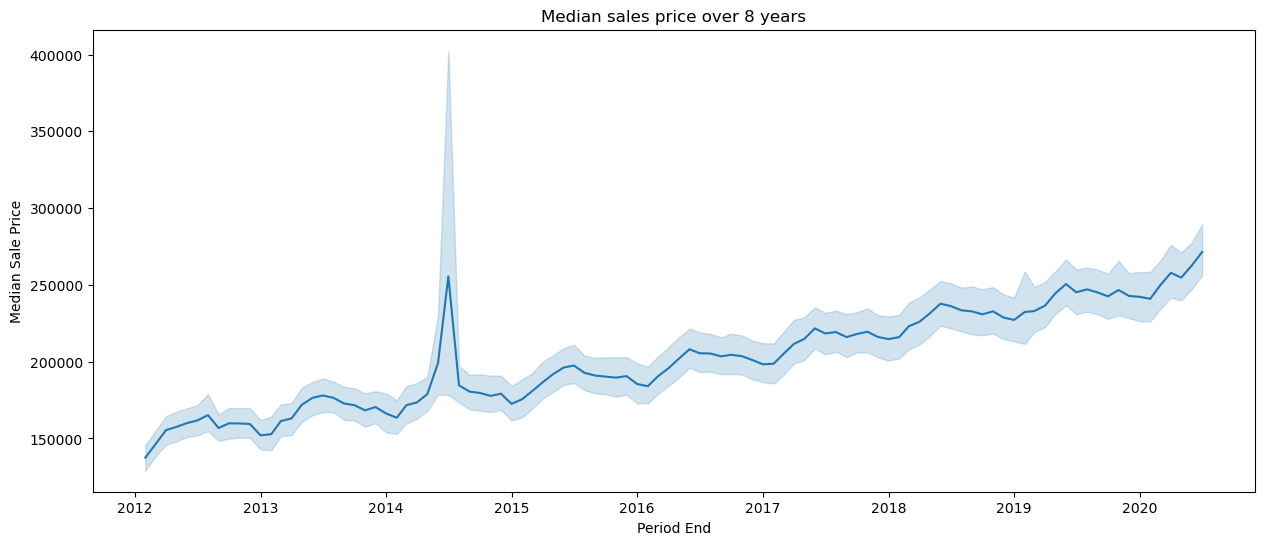

In [31]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Period End', y='Median Sale Price', data=df)
plt.title('Median sales price over 8 years');
plt.show()


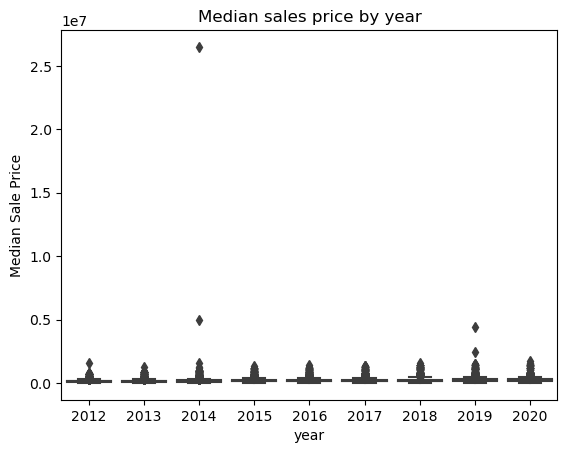

In [32]:
# box plot grouped by year
sns.boxplot(data=df, x='year', y="Median Sale Price")
plt.title('Median sales price by year');
plt.show()

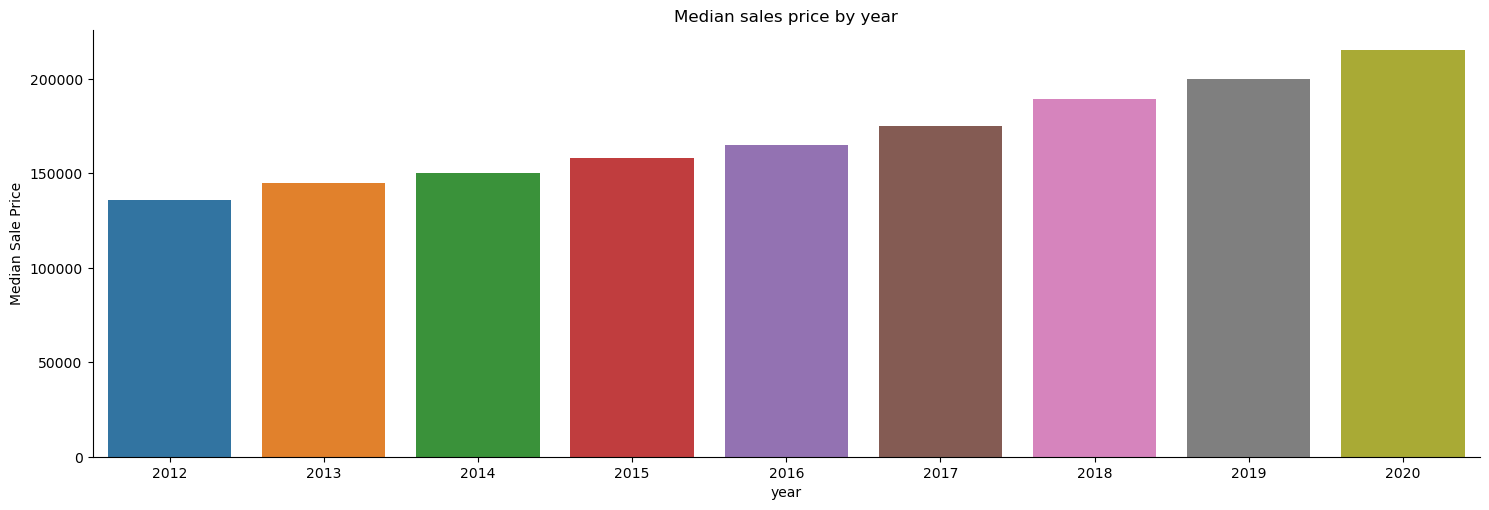

In [33]:
# seaborn bar plot displaying the Median Sale Price of each year from 2012 - 2020 

sns.catplot(x='year',y='Median Sale Price',data=df_year,kind='bar',aspect=3)
plt.title('Median sales price by year');
plt.show()

In [34]:
# Dataframe of Median Sales Price of each year by all four Geo Region

region = df[['Median Sale Price','year','Geo Region']].groupby(by=['year','Geo Region']).median().values

df_region = pd.DataFrame(region.reshape(9,4),index=list(range(2012,2021)),
                         columns= ['Midwest','Northeast','South','West'])

df_region

,Midwest,Northeast,South,West
2012,107000.0,165000.0,127000.0,193000.0
2013,111000.0,165000.0,136000.0,216500.0
2014,117000.0,165000.0,142000.0,230000.0
2015,125000.0,172000.0,152000.0,250000.0
2016,131000.0,175000.0,159000.0,265000.0
2017,138000.0,181000.0,169000.0,290000.0
2018,147000.0,191500.0,179000.0,319000.0
2019,155500.0,204000.0,190000.0,341000.0
2020,165000.0,218000.0,204000.0,360000.0


Looking furthar into the Average `Median Sales Price` by seeing how each Geo Region effects the target feature. It is apparent that the average median sales price is much higher in the West for each year.

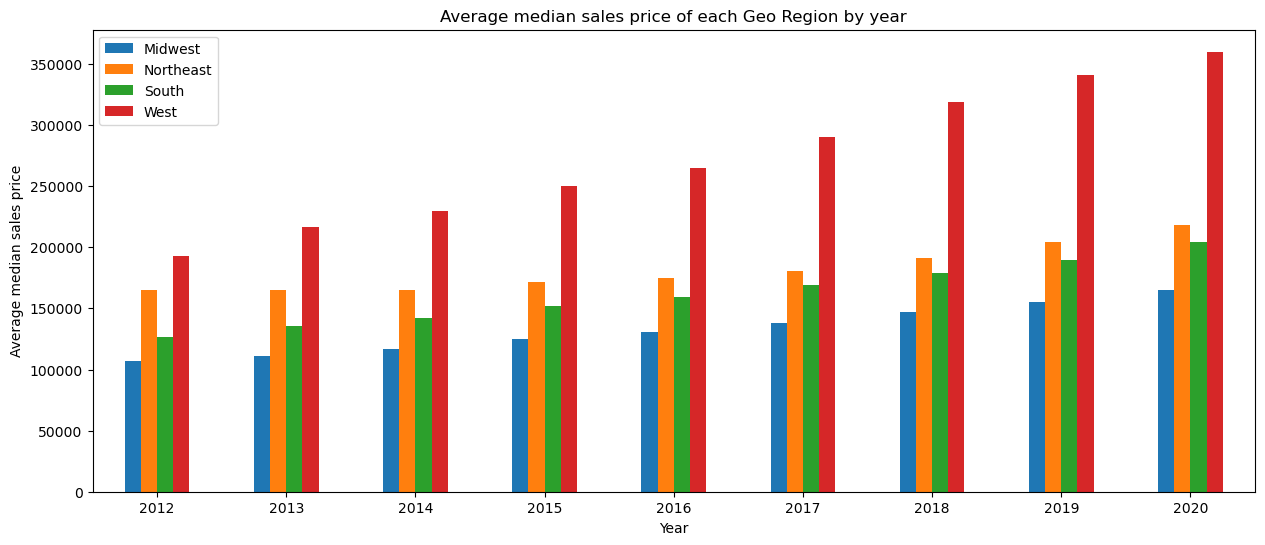

In [35]:
# Bar Plot of the Average Median Sales Price of each Geo Region by year

fig,ax = plt.subplots(figsize=(15,6))
df_region.plot(kind='bar',ax=ax, rot=0)
plt.title('Average median sales price of each Geo Region by year');
plt.ylabel('Average median sales price');
plt.xlabel('Year');
plt.show()

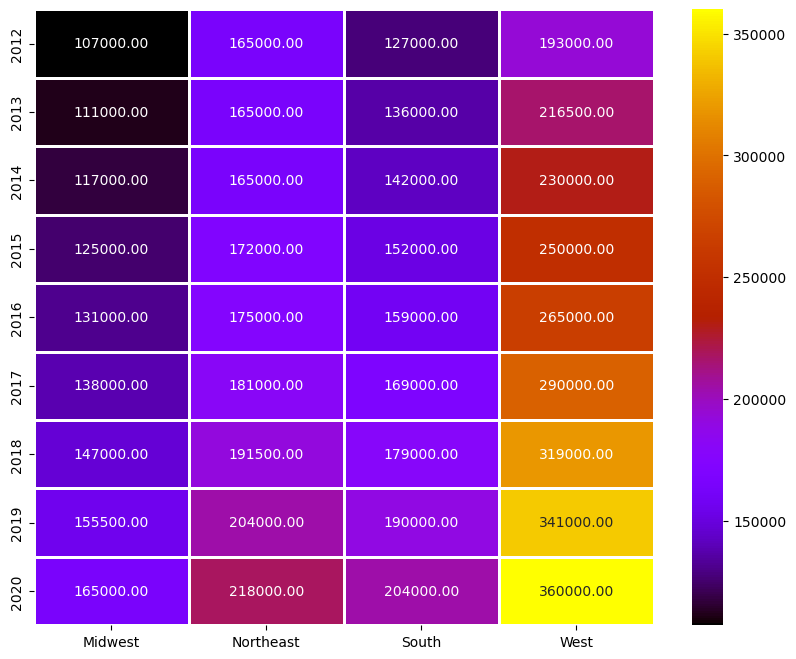

In [36]:
# heatmap by region

plt.figure(figsize=(10,8))
sns.heatmap(df_region,annot=True,fmt='.2f',cmap='gnuplot',linewidths=1)
plt.show()

In [37]:
region_sold = df[['Homes Sold','year','Geo Region']].groupby(by=['year','Geo Region']).median().values
region_sold_df = pd.DataFrame(region_sold.reshape(9,4),index=list(range(2012,2021)),
                         columns= ['Midwest','Northeast','South','West'])


region_sold_df

,Midwest,Northeast,South,West
2012,53.0,175.0,67.0,167.0
2013,55.0,181.0,78.0,179.0
2014,58.0,190.5,84.0,171.5
2015,73.0,275.0,98.0,193.0
2016,77.0,324.5,110.0,207.0
2017,78.5,353.0,118.0,210.5
2018,78.0,352.5,123.0,209.0
2019,78.5,351.0,127.5,211.5
2020,72.0,298.0,125.0,179.0


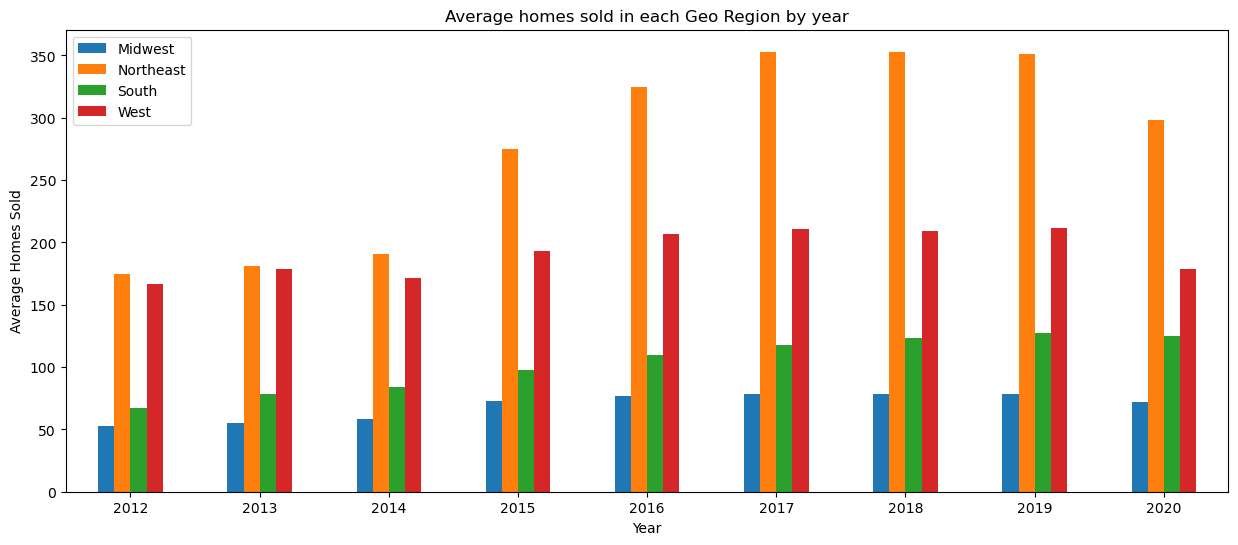

In [38]:
# Bar Plot of the Average Home's Sold in each Geo Region by year

fig,ax = plt.subplots(figsize=(15,6))
region_sold_df.plot(kind='bar',ax=ax, rot=0)
plt.title('Average homes sold in each Geo Region by year');
plt.ylabel('Average Homes Sold');
plt.xlabel('Year');
plt.show()

In [39]:
df_codes = df[['State Code', 'Median Sale Price']].groupby(by=['State Code']).median().sort_values('Median Sale Price', ascending=False)['Median Sale Price'][:12]
df_codes = df_codes.reset_index()
df_codes

,State Code,Median Sale Price
0,HI,486000.0
1,CA,429000.0
2,MA,380000.0
3,DC,371500.0
4,NM,315000.0
5,CO,311000.0
6,AK,260500.0
7,WA,250000.0
8,MD,240000.0
9,RI,234000.0


In [40]:
df_codes

,State Code,Median Sale Price
0,HI,486000.0
1,CA,429000.0
2,MA,380000.0
3,DC,371500.0
4,NM,315000.0
5,CO,311000.0
6,AK,260500.0
7,WA,250000.0
8,MD,240000.0
9,RI,234000.0


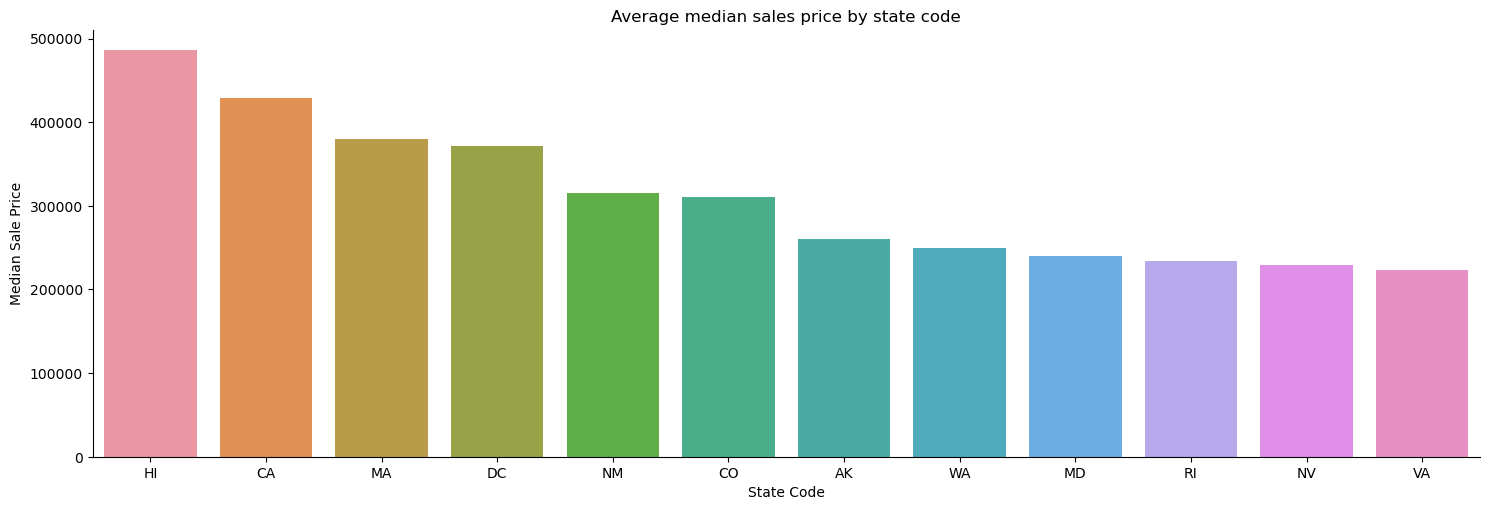

In [41]:
sns.catplot(x='State Code',y='Median Sale Price',data=df_codes,kind='bar',aspect=3)
plt.title('Average median sales price by state code');
plt.show()

plt.figure(figsize=(15,6))
sns.lineplot(x='Period End', y='months_of_supply', data=df).groupby(by=['Period End','Geo Region']).median().values()
plt.show()



In [42]:
df_top6 = df[(df['State Code']=='HI') | (df['State Code']=='CA') | (df['State Code']=='MA') | (df['State Code']=='DC') | (df['State Code']=='NM') | (df['State Code']=='CO')]
df_top6 = df_top6.set_index('Period End')
df_top6 = df_top6.drop(['Geo Region', 'parent_metro_region', 'year'], axis=1)
df_top6.head().T


Period End,2012-02-01,2012-02-01,2012-02-01,2012-02-01,2012-02-01
State Code,MA,CA,CA,CA,CA
Median Sale Price,535000.0,296000.0,121000.0,605000.0,275000.0
active_listings,144.0,1869.0,608.0,3270.0,8820.0
Median Dom,144.0,49.0,70.0,45.0,42.0
Avg Sale To List,0.926919,0.983255,0.984456,0.989895,0.987632
Homes Sold,10.0,402.0,141.0,822.0,1853.0
New Listings,23.0,594.0,132.0,1203.0,3002.0
Inventory,133.0,1313.0,435.0,2021.0,5527.0
pending_sales,3.0,379.0,107.0,911.0,2411.0
months_of_supply,13.3,3.3,3.1,2.5,3.0


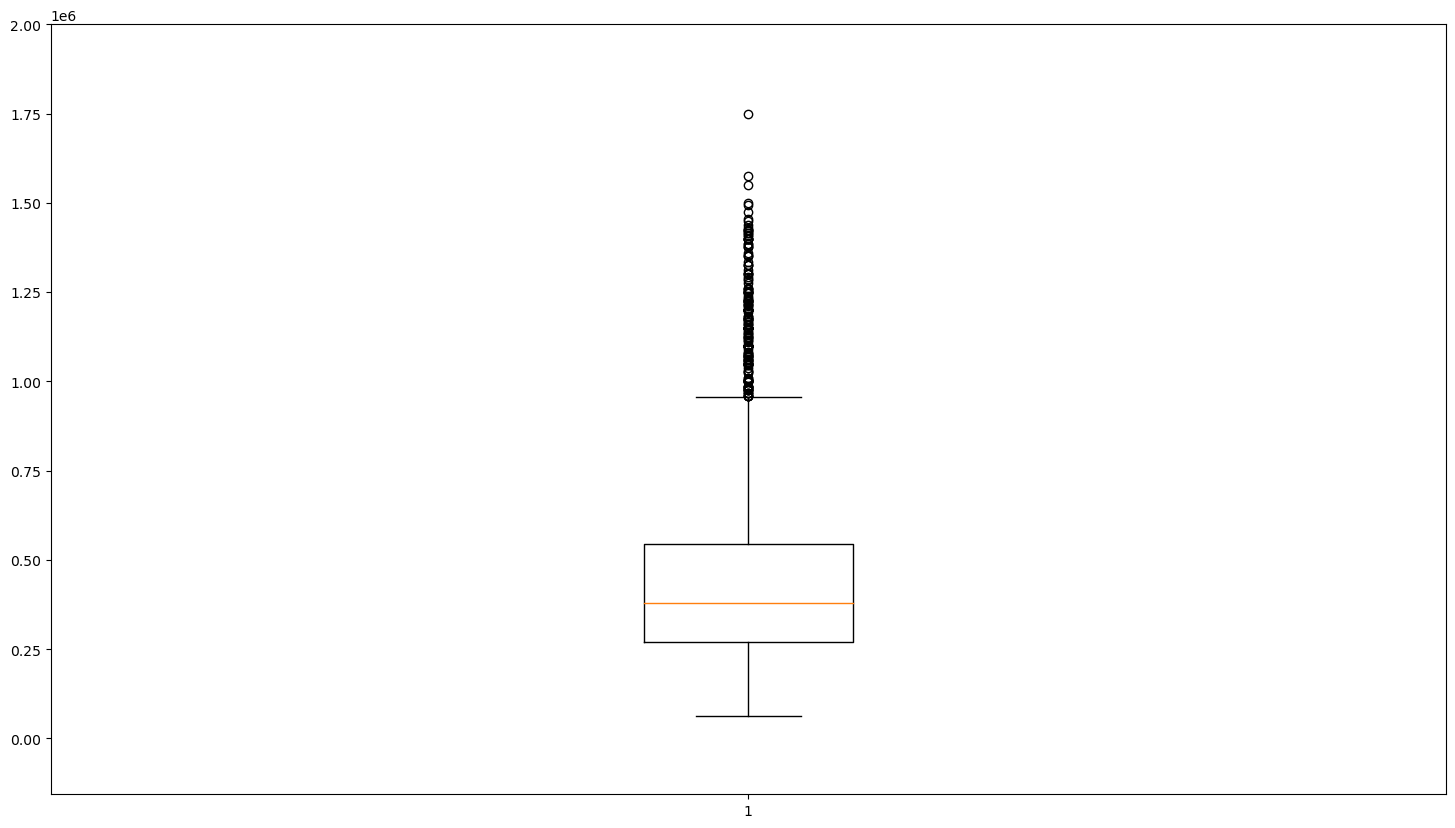

In [43]:
#outlier detection

plt.figure(figsize= (18,10))
plt.boxplot(df_top6['Median Sale Price'])
plt.autoscale(axis='x', tight=True)
plt.ylim(top = 2000000)
plt.show()

   ## Data Processing and Modeling

    The three models used for modeling the forecasting model are the ______ model, ________ and an ______model. The best model based on performance will be used for making forecast into the future for the median sales price of the top five states with the highest property values.

In [44]:
df_top6.head()

,State Code,Median Sale Price,active_listings,Median Dom,Avg Sale To List,Homes Sold,New Listings,Inventory,pending_sales,months_of_supply
Period End,,,,,,,,,,
2012-02-01,MA,535000.0,144.0,144.0,0.926919,10.0,23.0,133.0,3.0,13.3
2012-02-01,CA,296000.0,1869.0,49.0,0.983255,402.0,594.0,1313.0,379.0,3.3
2012-02-01,CA,121000.0,608.0,70.0,0.984456,141.0,132.0,435.0,107.0,3.1
2012-02-01,CA,605000.0,3270.0,45.0,0.989895,822.0,1203.0,2021.0,911.0,2.5
2012-02-01,CA,275000.0,8820.0,42.0,0.987632,1853.0,3002.0,5527.0,2411.0,3.0


In [45]:
df_top6.describe().T

,count,mean,std,min,25%,50%,75%,max
Median Sale Price,4647.0,433908.865935,242276.732256,62000.000000,270000.000000,380000.000000,545000.000000,4.426000e+06
active_listings,4647.0,4062.565311,6048.956620,23.000000,671.000000,1604.000000,3719.000000,3.290500e+04
Median Dom,4647.0,60.317947,57.304829,6.000000,27.500000,44.000000,70.000000,1.079000e+03
Avg Sale To List,4647.0,0.984798,0.025215,0.828685,0.972781,0.985374,0.995455,1.121664e+00
Homes Sold,4647.0,1077.023456,1615.431039,2.000000,156.000000,381.000000,894.500000,8.639000e+03
New Listings,4647.0,1281.389068,1970.163877,1.000000,171.000000,433.000000,1103.000000,1.086500e+04
Inventory,4647.0,2800.705401,4238.901133,11.000000,507.500000,1165.000000,2572.500000,2.557000e+04
pending_sales,4647.0,967.443189,1500.918743,1.000000,95.000000,307.000000,859.000000,8.032000e+03
months_of_supply,4647.0,3.757564,3.304168,0.300000,2.100000,2.900000,4.200000,5.700000e+01


    I have resampled the data, creating a mean sale price for each month from 2012 to 2020. 
    Now we have a Time Series!

In [46]:
# Aggregating the top five states data by month

ts = df_top6.resample('MS').mean()
ts.shape

(102, 9)

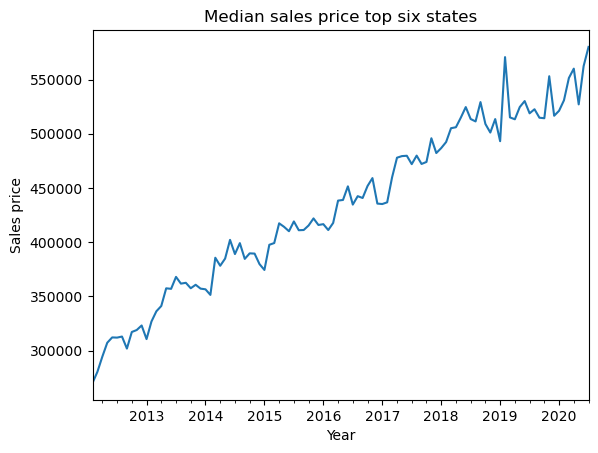

In [47]:
ts['Median Sale Price'].plot.line()
plt.title('Median sales price top six states');
plt.ylabel('Sales price');
plt.xlabel('Year');

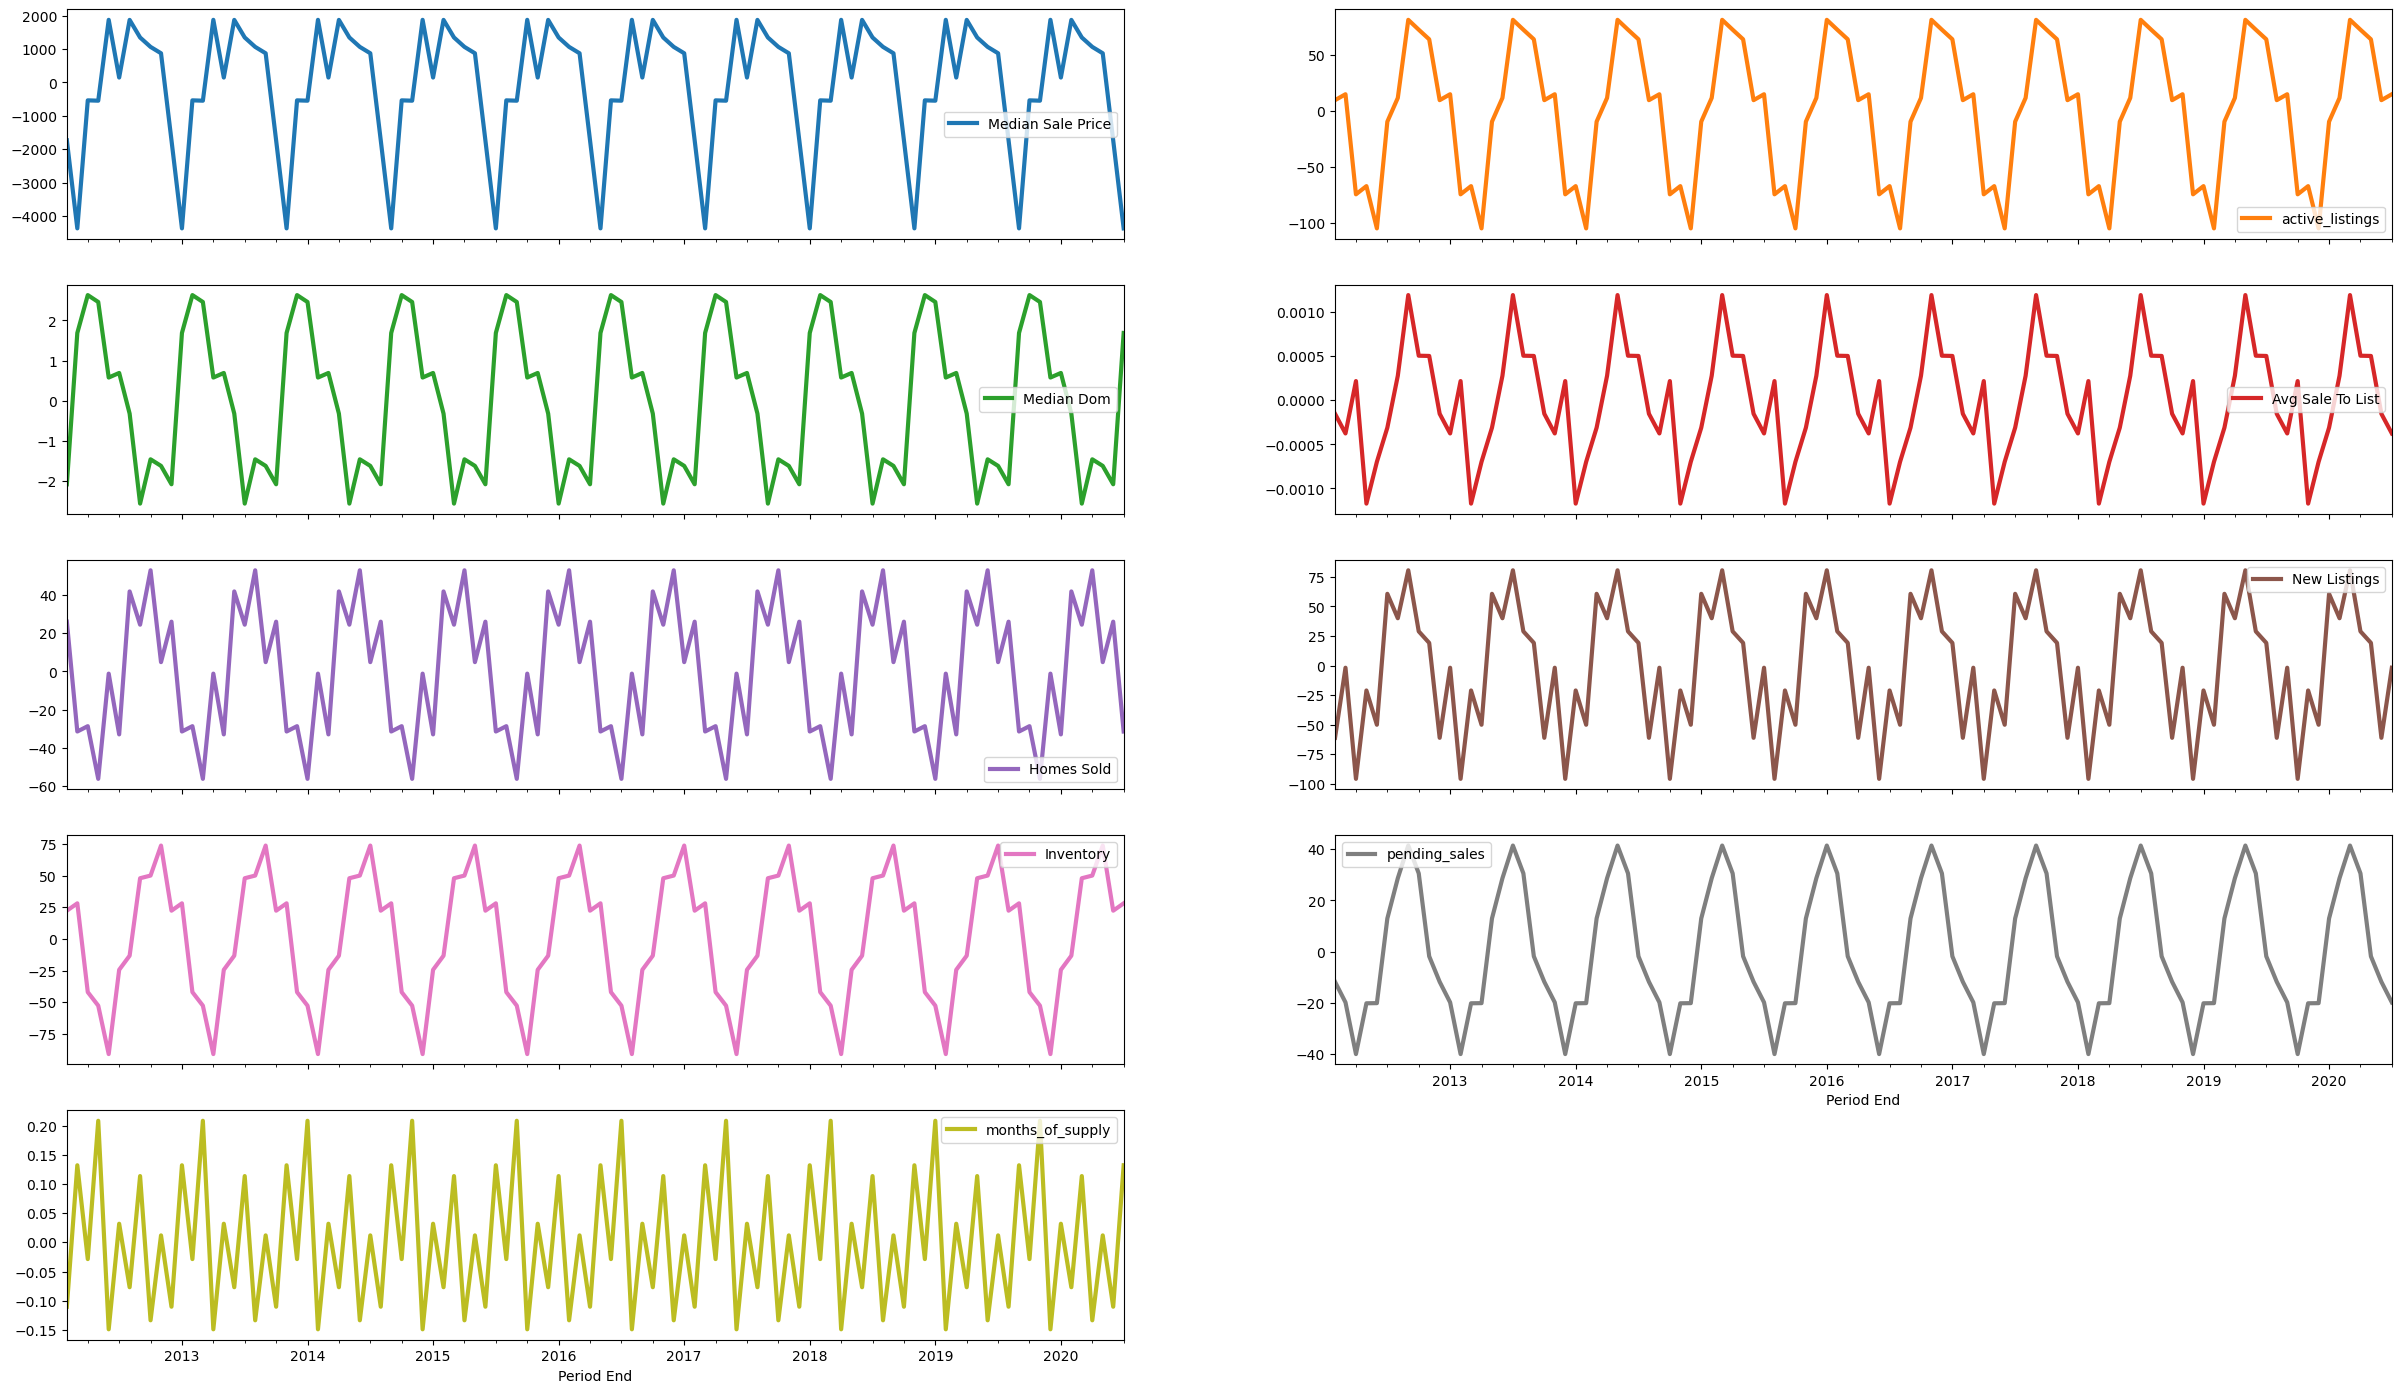

In [48]:
# Init empty dict to store decompose results

from matplotlib import rcParams

seasonality_dict = {}

for col in ts.columns:
    decompositions = sm.tsa.seasonal_decompose(ts[col], period= 10)
    # Store the results back
    seasonality_dict[col] = decompositions.seasonal

# Plot
rcParams["figure.figsize"] = 30, 28
pd.DataFrame(seasonality_dict).plot(
    subplots=True, layout=(8, 2), linewidth=3
    );

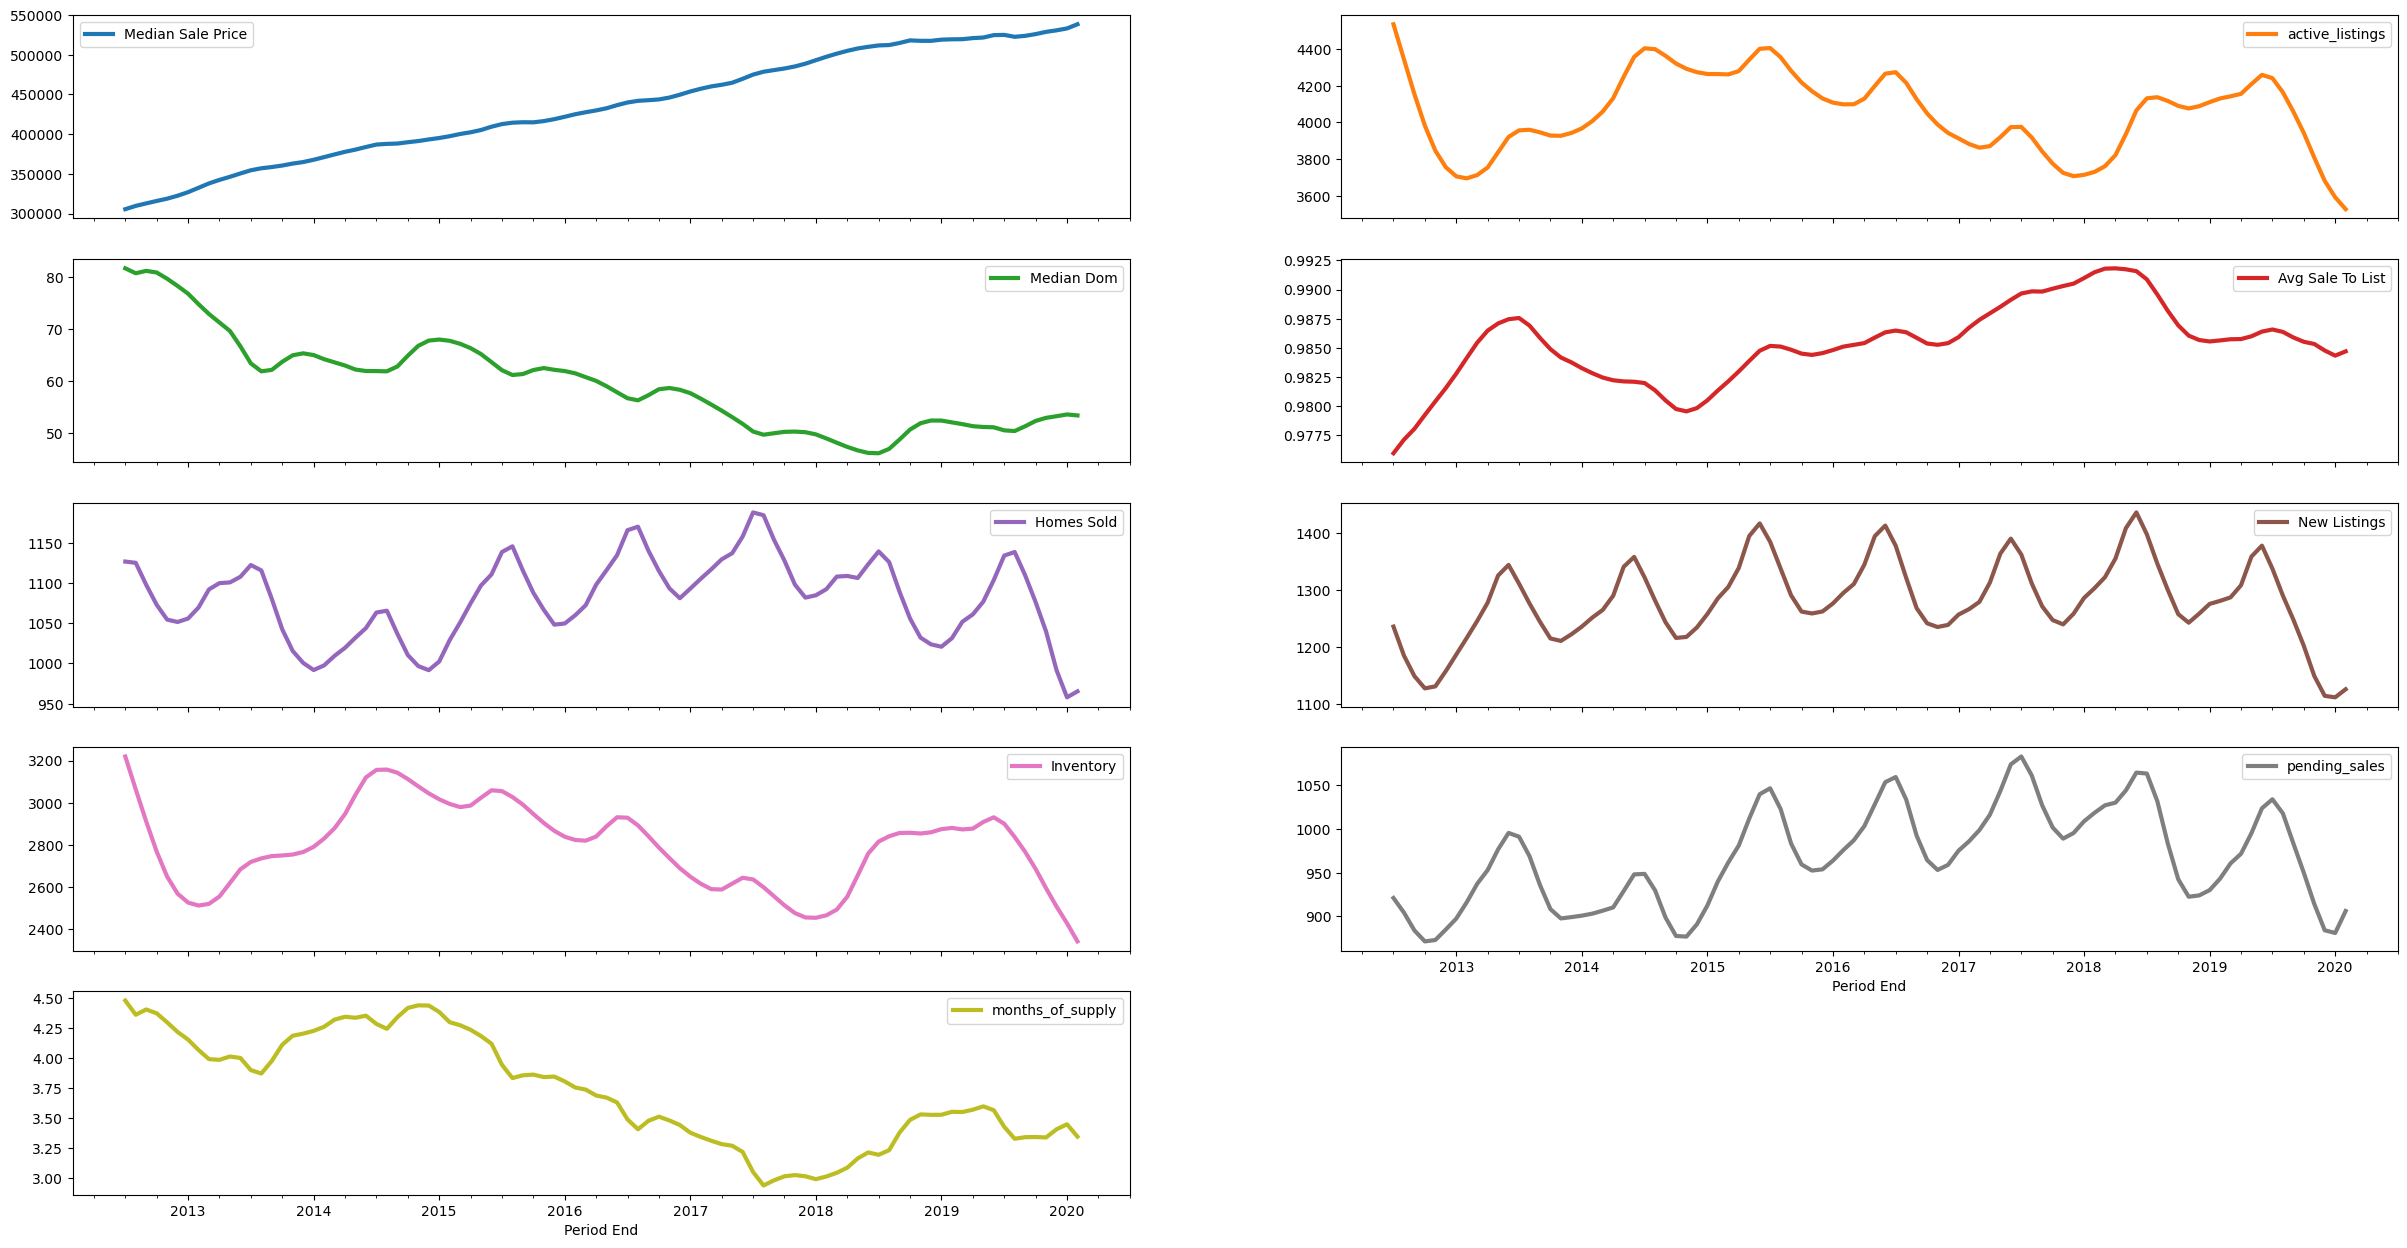

In [49]:
trend_dict = {}

for col in ts.columns:
    decomposition = sm.tsa.seasonal_decompose(ts[col], period= 10)
    # Store back the results
    trend_dict[col] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(9, 2), linewidth=3);


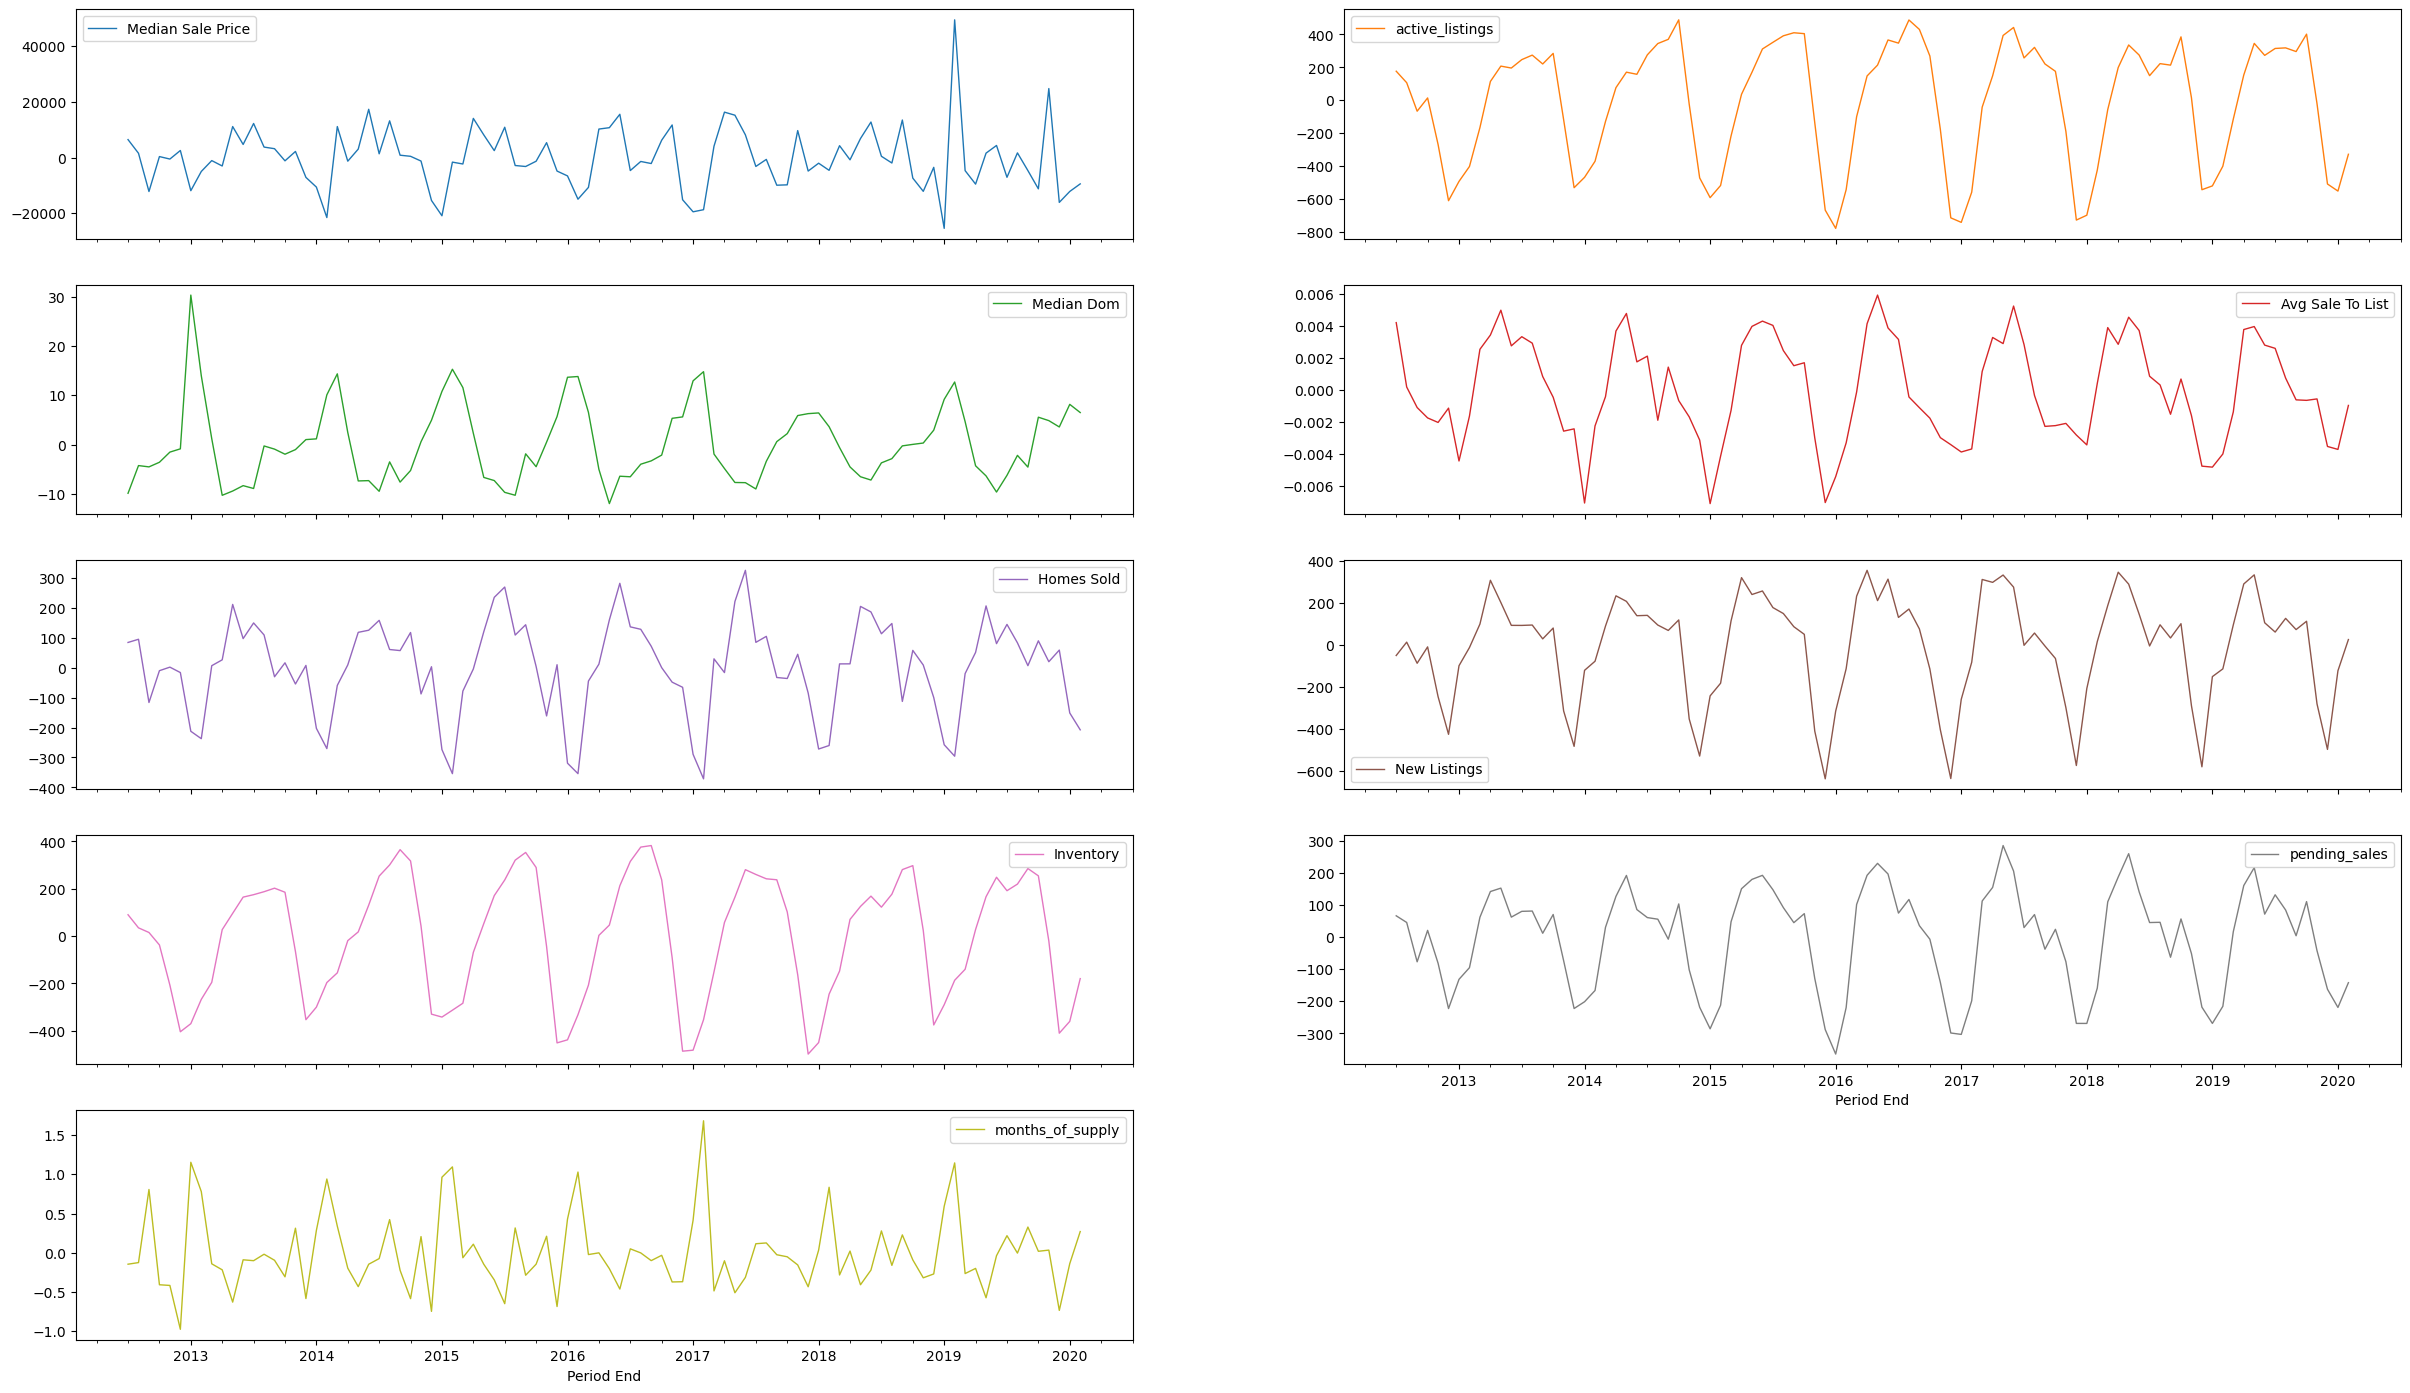

In [50]:
resid_dict = {}

for col in ts.columns:
    decomposition = sm.tsa.seasonal_decompose(ts[col], period = 10)
    resid_dict[col] = decomposition.resid

pd.DataFrame(resid_dict).plot(subplots=True, layout=(8, 2), linewidth=1);

    The trend shows that from 2013 house prices slowly start to increase. The residual shows the time-series with the trend and seasonality removed. Looking at the residual plot, it is clear that house prices fluctuate more heavily and sporadically from 2019 onwards.

In [51]:
for i in ts.columns:
  result = adfuller(x=ts[i].values)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
  if result[0] < value:
    print('\n','The series is stationary')
  else:
    print('\n','The series is non-stationary')
  print()

ADF Statistic: -1.274650
p-value: 0.640689
Critical Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585

 The series is non-stationary

ADF Statistic: -2.019179
p-value: 0.278227
Critical Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585

 The series is non-stationary

ADF Statistic: -2.628372
p-value: 0.087274
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584

 The series is stationary

ADF Statistic: -2.336229
p-value: 0.160549
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584

 The series is non-stationary

ADF Statistic: -1.468873
p-value: 0.548850
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584

 The series is non-stationary

ADF Statistic: -2.051991
p-value: 0.264252
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584

 The series is non-stationary

ADF Statistic: -0.958482
p-value: 0.768104
Critical Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585

 The series is non-stationary

ADF Statistic: -1.851963
p-value: 0.354986
Critical Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585

 Th

The rolling mean is increasing continualy, so time series is non stationary. Test statistics > critacal value percentages & P-value > 0.05 so time series is non stationary.

In [52]:
ts_dif = ts.diff().dropna()

In [53]:
for col in ts_dif.columns:
  result = adfuller(x=ts_dif[col].values)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
  if result[0] < value:
    print('\n','The series is stationary')
  else:
    print('\n','The series is non-stationary')
  print()

ADF Statistic: -2.512722
p-value: 0.112409
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585

 The series is non-stationary

ADF Statistic: -3.227913
p-value: 0.018425
Critical Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585

 The series is stationary

ADF Statistic: -2.901931
p-value: 0.045124
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585

 The series is stationary

ADF Statistic: -2.956907
p-value: 0.039119
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584

 The series is stationary

ADF Statistic: -5.120662
p-value: 0.000013
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584

 The series is stationary

ADF Statistic: -5.021672
p-value: 0.000020
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584

 The series is stationary

ADF Statistic: -2.531492
p-value: 0.107999
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585

 The series is non-stationary

ADF Statistic: -3.260877
p-value: 0.016720
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585

 The series is stat

In [54]:
ts_dif2 = ts_dif.diff().dropna()

In [55]:
for i in ts_dif2.columns:
  result = adfuller(x=ts_dif2[i].values)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
  if result[0] < value:
    print('\n','The series is stationary')
  else:
    print('\n','The series is non-stationary')
  print()

ADF Statistic: -7.326265
p-value: 0.000000
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585

 The series is stationary

ADF Statistic: -5.467925
p-value: 0.000002
Critical Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585

 The series is stationary

ADF Statistic: -8.998814
p-value: 0.000000
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585

 The series is stationary

ADF Statistic: -7.876793
p-value: 0.000000
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584

 The series is stationary

ADF Statistic: -7.767549
p-value: 0.000000
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585

 The series is stationary

ADF Statistic: -8.979459
p-value: 0.000000
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585

 The series is stationary

ADF Statistic: -2.848817
p-value: 0.051632
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585

 The series is stationary

ADF Statistic: -9.112267
p-value: 0.000000
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585

 The series is stationary



In [56]:
# Splitting the data into training and testing data

obs = 30
ts_train, ts_test = ts_dif2[:-obs], ts_dif2[-obs:]

Plot ACF & PACF

In [57]:
# ACF
lag_acf = acf(ts_train['Median Sale Price'],nlags=20)
#PACF
lag_pacf = pacf(ts_train['Median Sale Price'], nlags=20, method='ols')

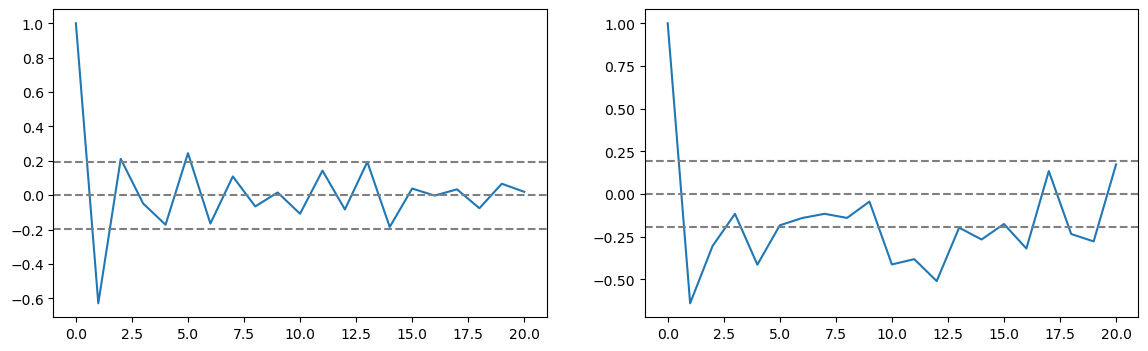

In [58]:
fig,ax = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = ax.flatten()
ax1.plot(lag_acf)
ax1.axhline(y=0,linestyle='--',color= 'gray')
ax1.axhline(y= - 1.96/np.sqrt(len(ts_dif)), linestyle='--',color= 'gray')
ax1.axhline(y=  1.96/np.sqrt(len(ts_dif)), linestyle='--',color= 'gray')

ax2.plot(lag_pacf,)
ax2.axhline(y=0,linestyle = '--', color = 'gray')
ax2.axhline(y = -1.96/np.sqrt(len(ts_dif)), linestyle = '--', color = 'gray')
ax2.axhline(y = 1.96/np.sqrt(len(ts_dif)), linestyle = '--', color = 'gray')
plt.show()

The dotted lines in confidence interval, this can be used to determine p and q.

p: The lag value where the PACF chart crosses upper chart for first time.
q: The lag value where ACF chart crosses upper chart for first time. Here p = 1, q = 1, order = (1,1,1)

In [61]:
p, d, q = 2, 1, 1
model = ARIMA(ts_train["Median Sale Price"], order=(p,d,q))  
res = model.fit()  
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:      Median Sale Price   No. Observations:                   70
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -751.331
Date:                Sat, 16 Dec 2023   AIC                           1510.661
Time:                        14:35:20   BIC                           1519.597
Sample:                    04-01-2012   HQIC                          1514.206
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8132      0.140     -5.794      0.000      -1.088      -0.538
ar.L2         -0.2895      0.116     -2.492      0.013      -0.517      -0.062
ma.L1         -1.0000      0.148     -6.736      0.0

In [62]:
history = [x for x in ts_train['Median Sale Price']]
predictions = list()

In [117]:
for t in range(len(ts_test['Median Sale Price'])):
    model = ARIMA(history, order=(4,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = ts_test['Median Sale Price'][t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=-14527.231283, expected=1021.739130
predicted=3774.451810, expected=7163.043478
predicted=8917.458354, expected=-11858.695652
predicted=32153.532460, expected=8010.869565
predicted=-9684.373274, expected=782.608696
predicted=-2005.564339, expected=-20695.652174
predicted=14434.137755, expected=8782.608696
predicted=-6094.129508, expected=20065.217391
predicted=-20704.348086, expected=-38000.000000
predicted=17321.485267, expected=12239.130435
predicted=-1471.530581, expected=20336.956522
predicted=-17522.966893, expected=-32782.608696
predicted=14140.402821, expected=97869.565217
predicted=-66756.258047, expected=-133054.347826
predicted=92369.269204, expected=53804.347826
predicted=8800.179001, expected=13043.478261
predicted=-36786.250060, expected=-5793.478261
predicted=-3602.996085, expected=-16793.478261
predicted=-14363.038231, expected=15032.608696
predicted=22936.567009, expected=-11532.608696
predicted=1136.694279, expected=7304.347826
predicted=-10517.321733, expect

In [106]:
predict = res.predict()

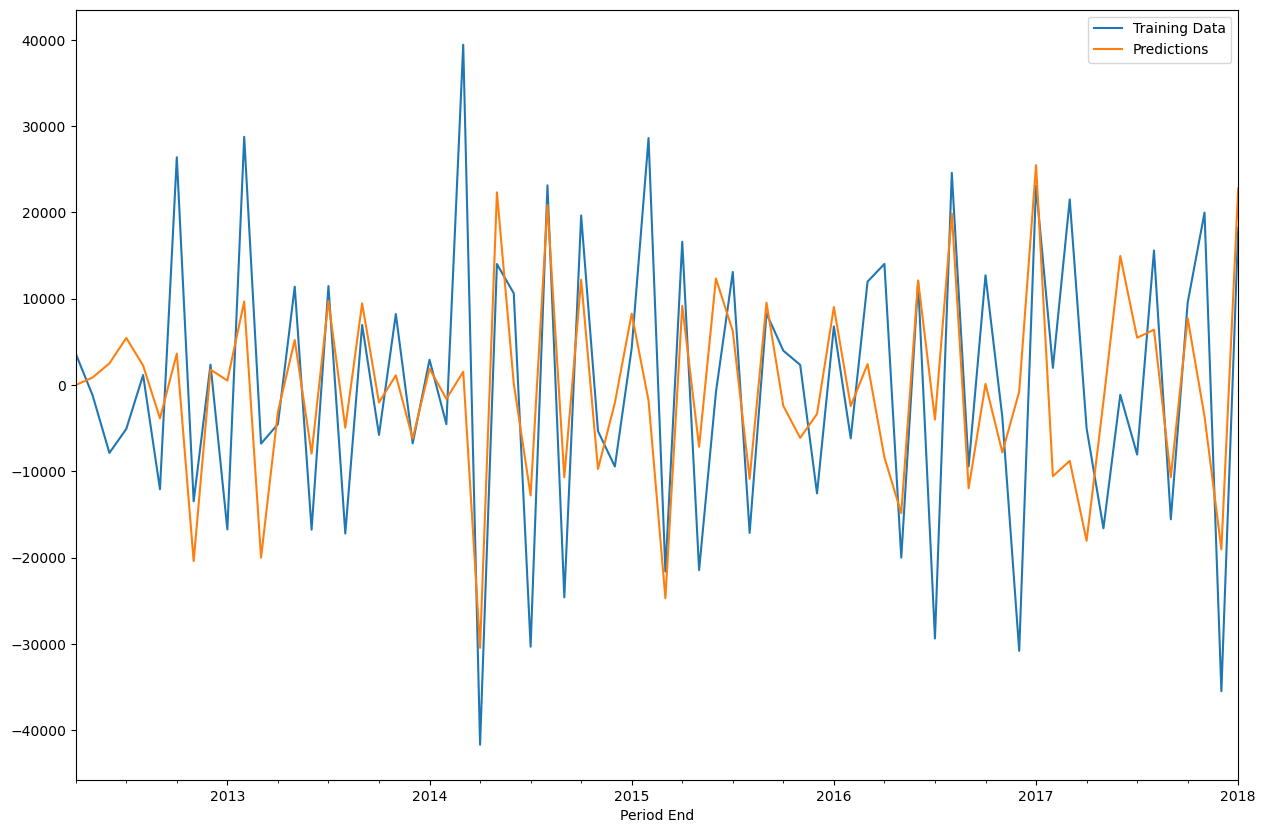

In [107]:
ts_train["Median Sale Price"].plot(legend=True, label="Training Data", figsize=(15, 10))
predict.plot(legend=True, label="Predictions")
plt.show()

In [119]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,'corr':corr})

forecast_accuracy(predictions[-30:], ts_test['Median Sale Price'])

{'mape': 2.1044562217891163,
 'me': 25.496449897446535,
 'mae': 23844.76875217613,
 'mpe': -1.2947719787574354,
 'rmse': 30254.099538023274,
 'corr': 0.6832096461602714}

### Linear Regression Model

In [135]:
# Import Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [136]:
# Apply scaler() to all the columns except any 'dummy' variables

num_vars = ['active_listings', 'Median Dom', 'Avg Sale To List', 'Homes Sold', 'New Listings', 'Inventory', 'pending_sales', 'months_of_supply']



In [138]:
#Scale on the training data

tr_scaled = scaler.fit_transform(ts_train[num_vars])


tr_scaled = pd.DataFrame(tr_scaled, index=ts_train.index, columns=num_vars)

In [128]:
X =ts_dif2.drop('Median Sale Price', axis =1)
y= ts_dif2['Median Sale Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 432)

In [124]:
# Linear regression model

lm = LinearRegression()

In [129]:
lm.fit(X_train, y_train)

LinearRegression()

In [130]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [132]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [133]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Median Sale Price   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.323
Date:                Sat, 16 Dec 2023   Prob (F-statistic):              0.250
Time:                        14:55:23   Log-Likelihood:                -804.53
No. Observations:                  70   AIC:                             1627.
Df Residuals:                      61   BIC:                             1647.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1090.6121   3136.318  

In [134]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
vif = pd.DataFrame()
X_vif = X_train
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,active_listings,137.12
7,pending_sales,57.74
6,Inventory,45.85
5,New Listings,6.48
4,Homes Sold,5.83
8,months_of_supply,5.69
3,Avg Sale To List,1.65
2,Median Dom,1.62
0,const,1.07


In [137]:
y_train_price = lm.predict(X_train)

In [139]:
res = (y_train_price - y_train)

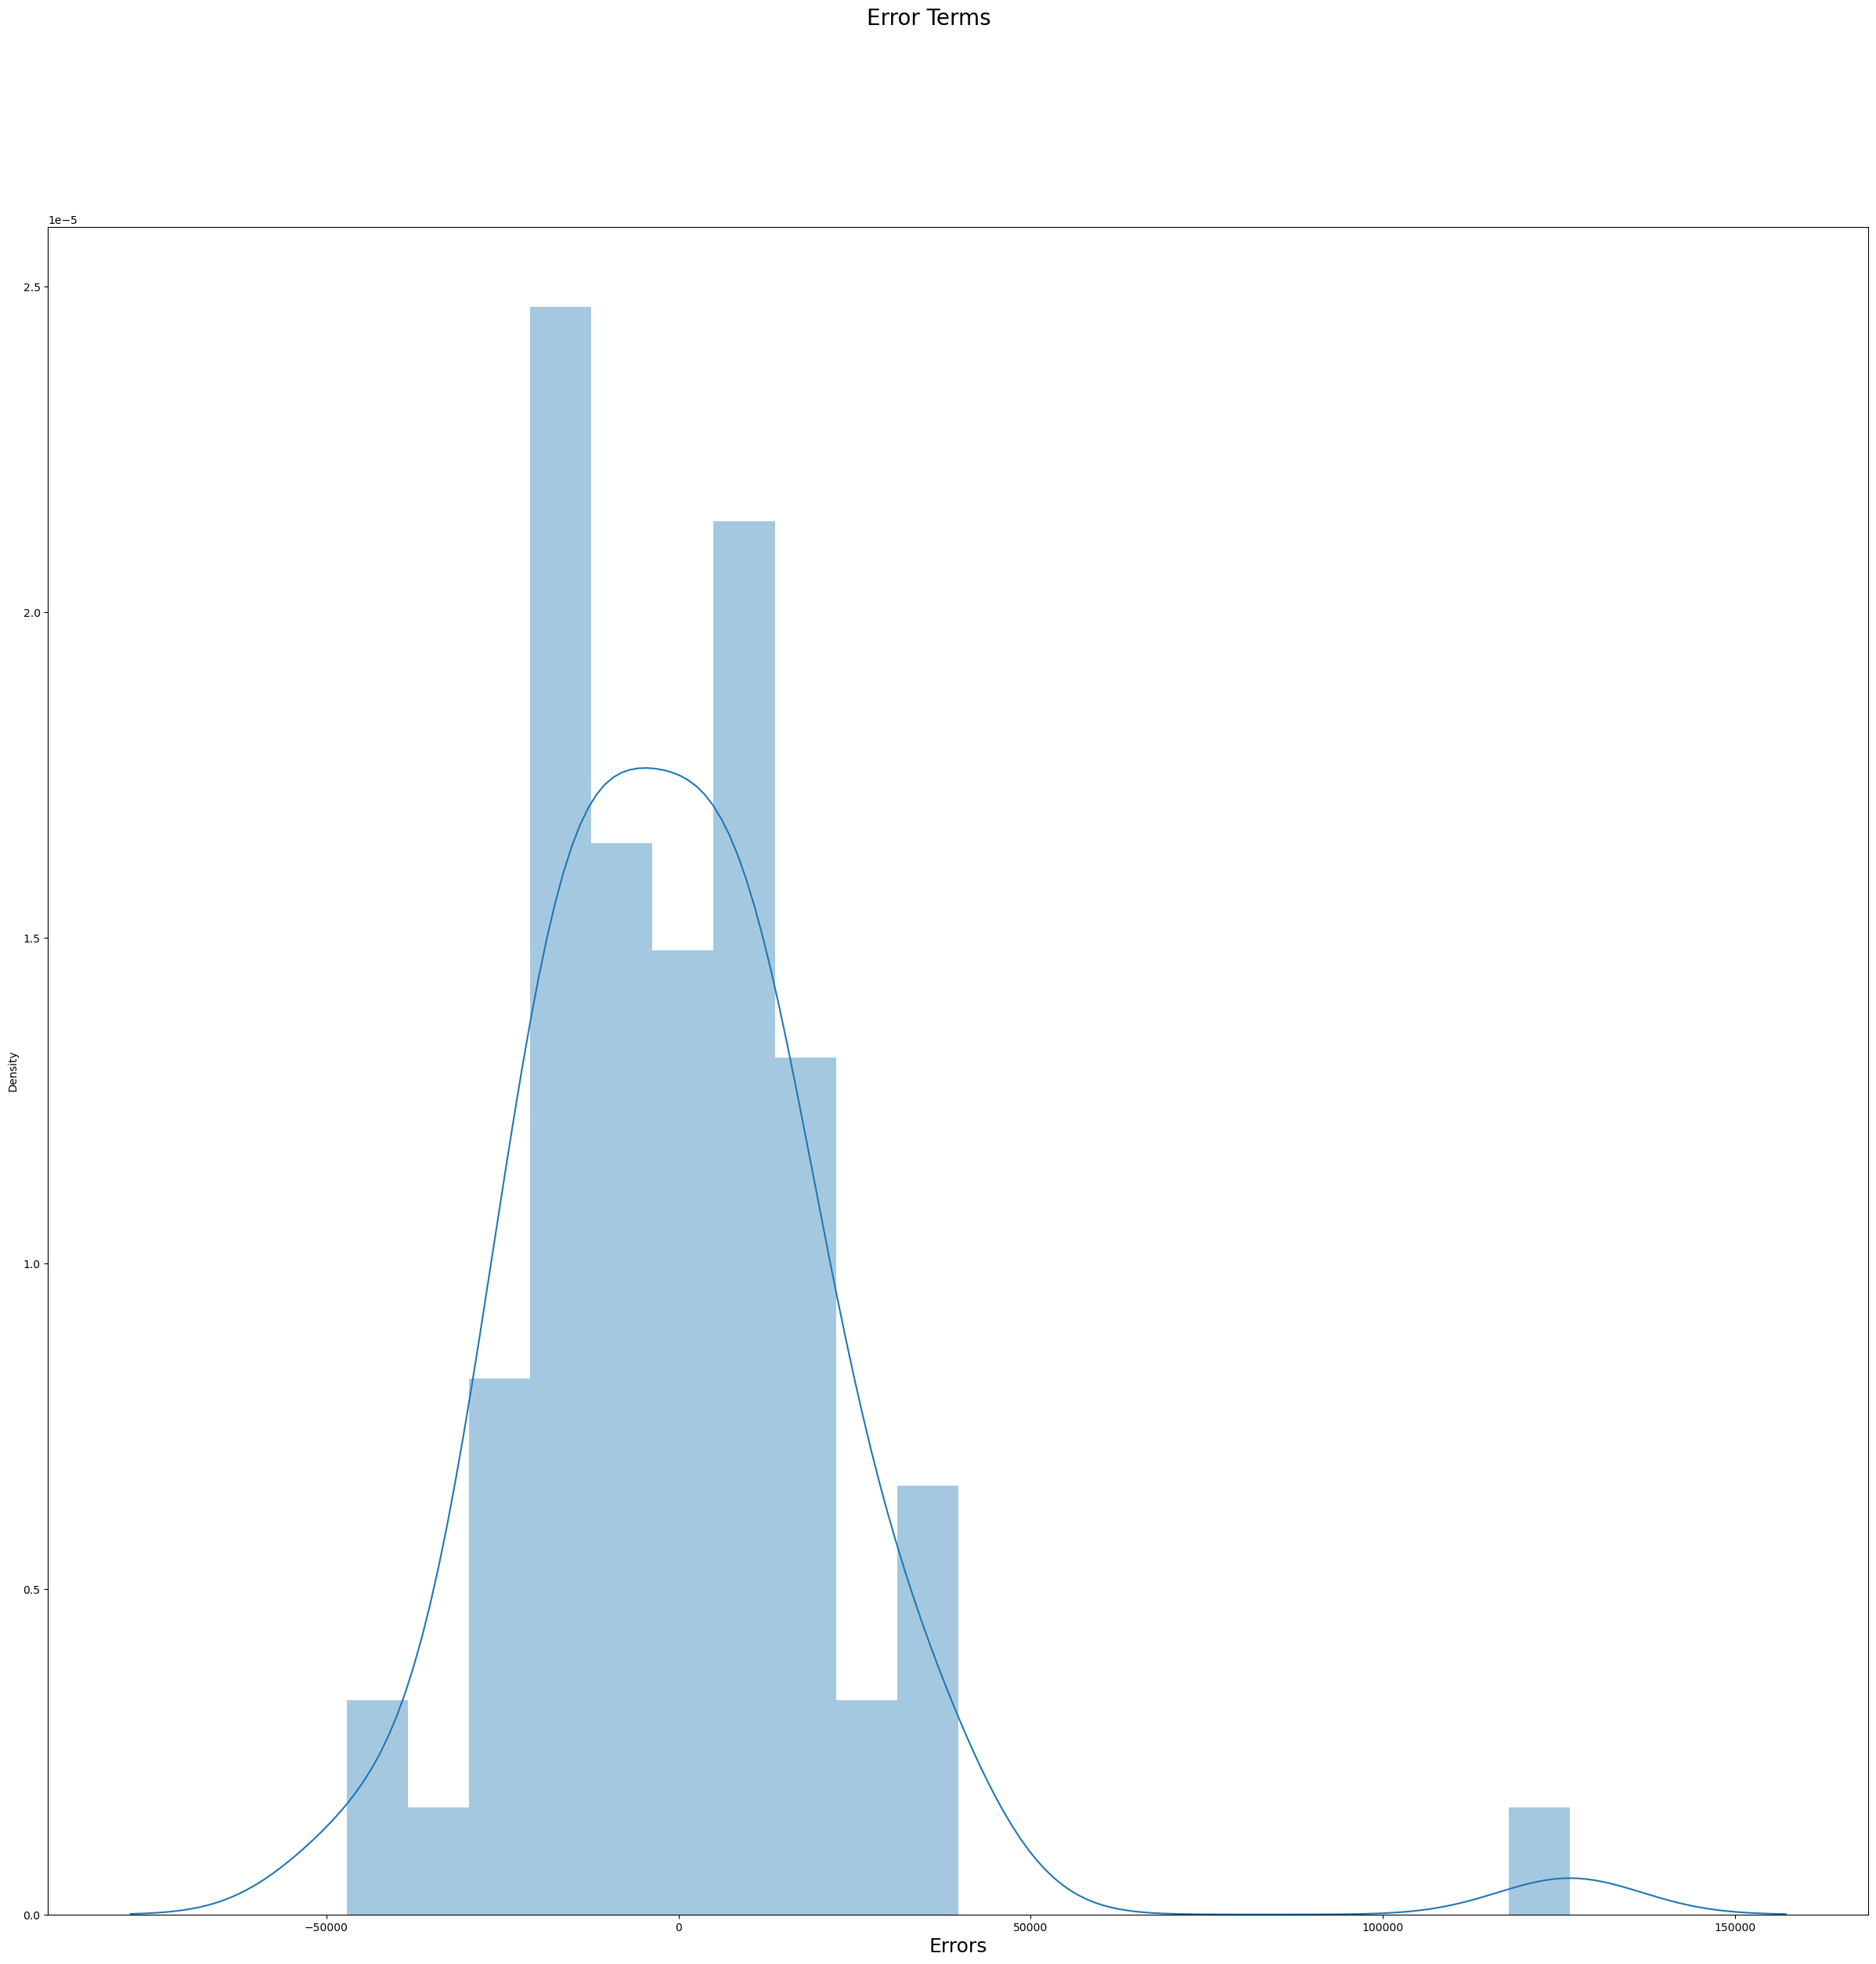

In [140]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_train_price - y_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

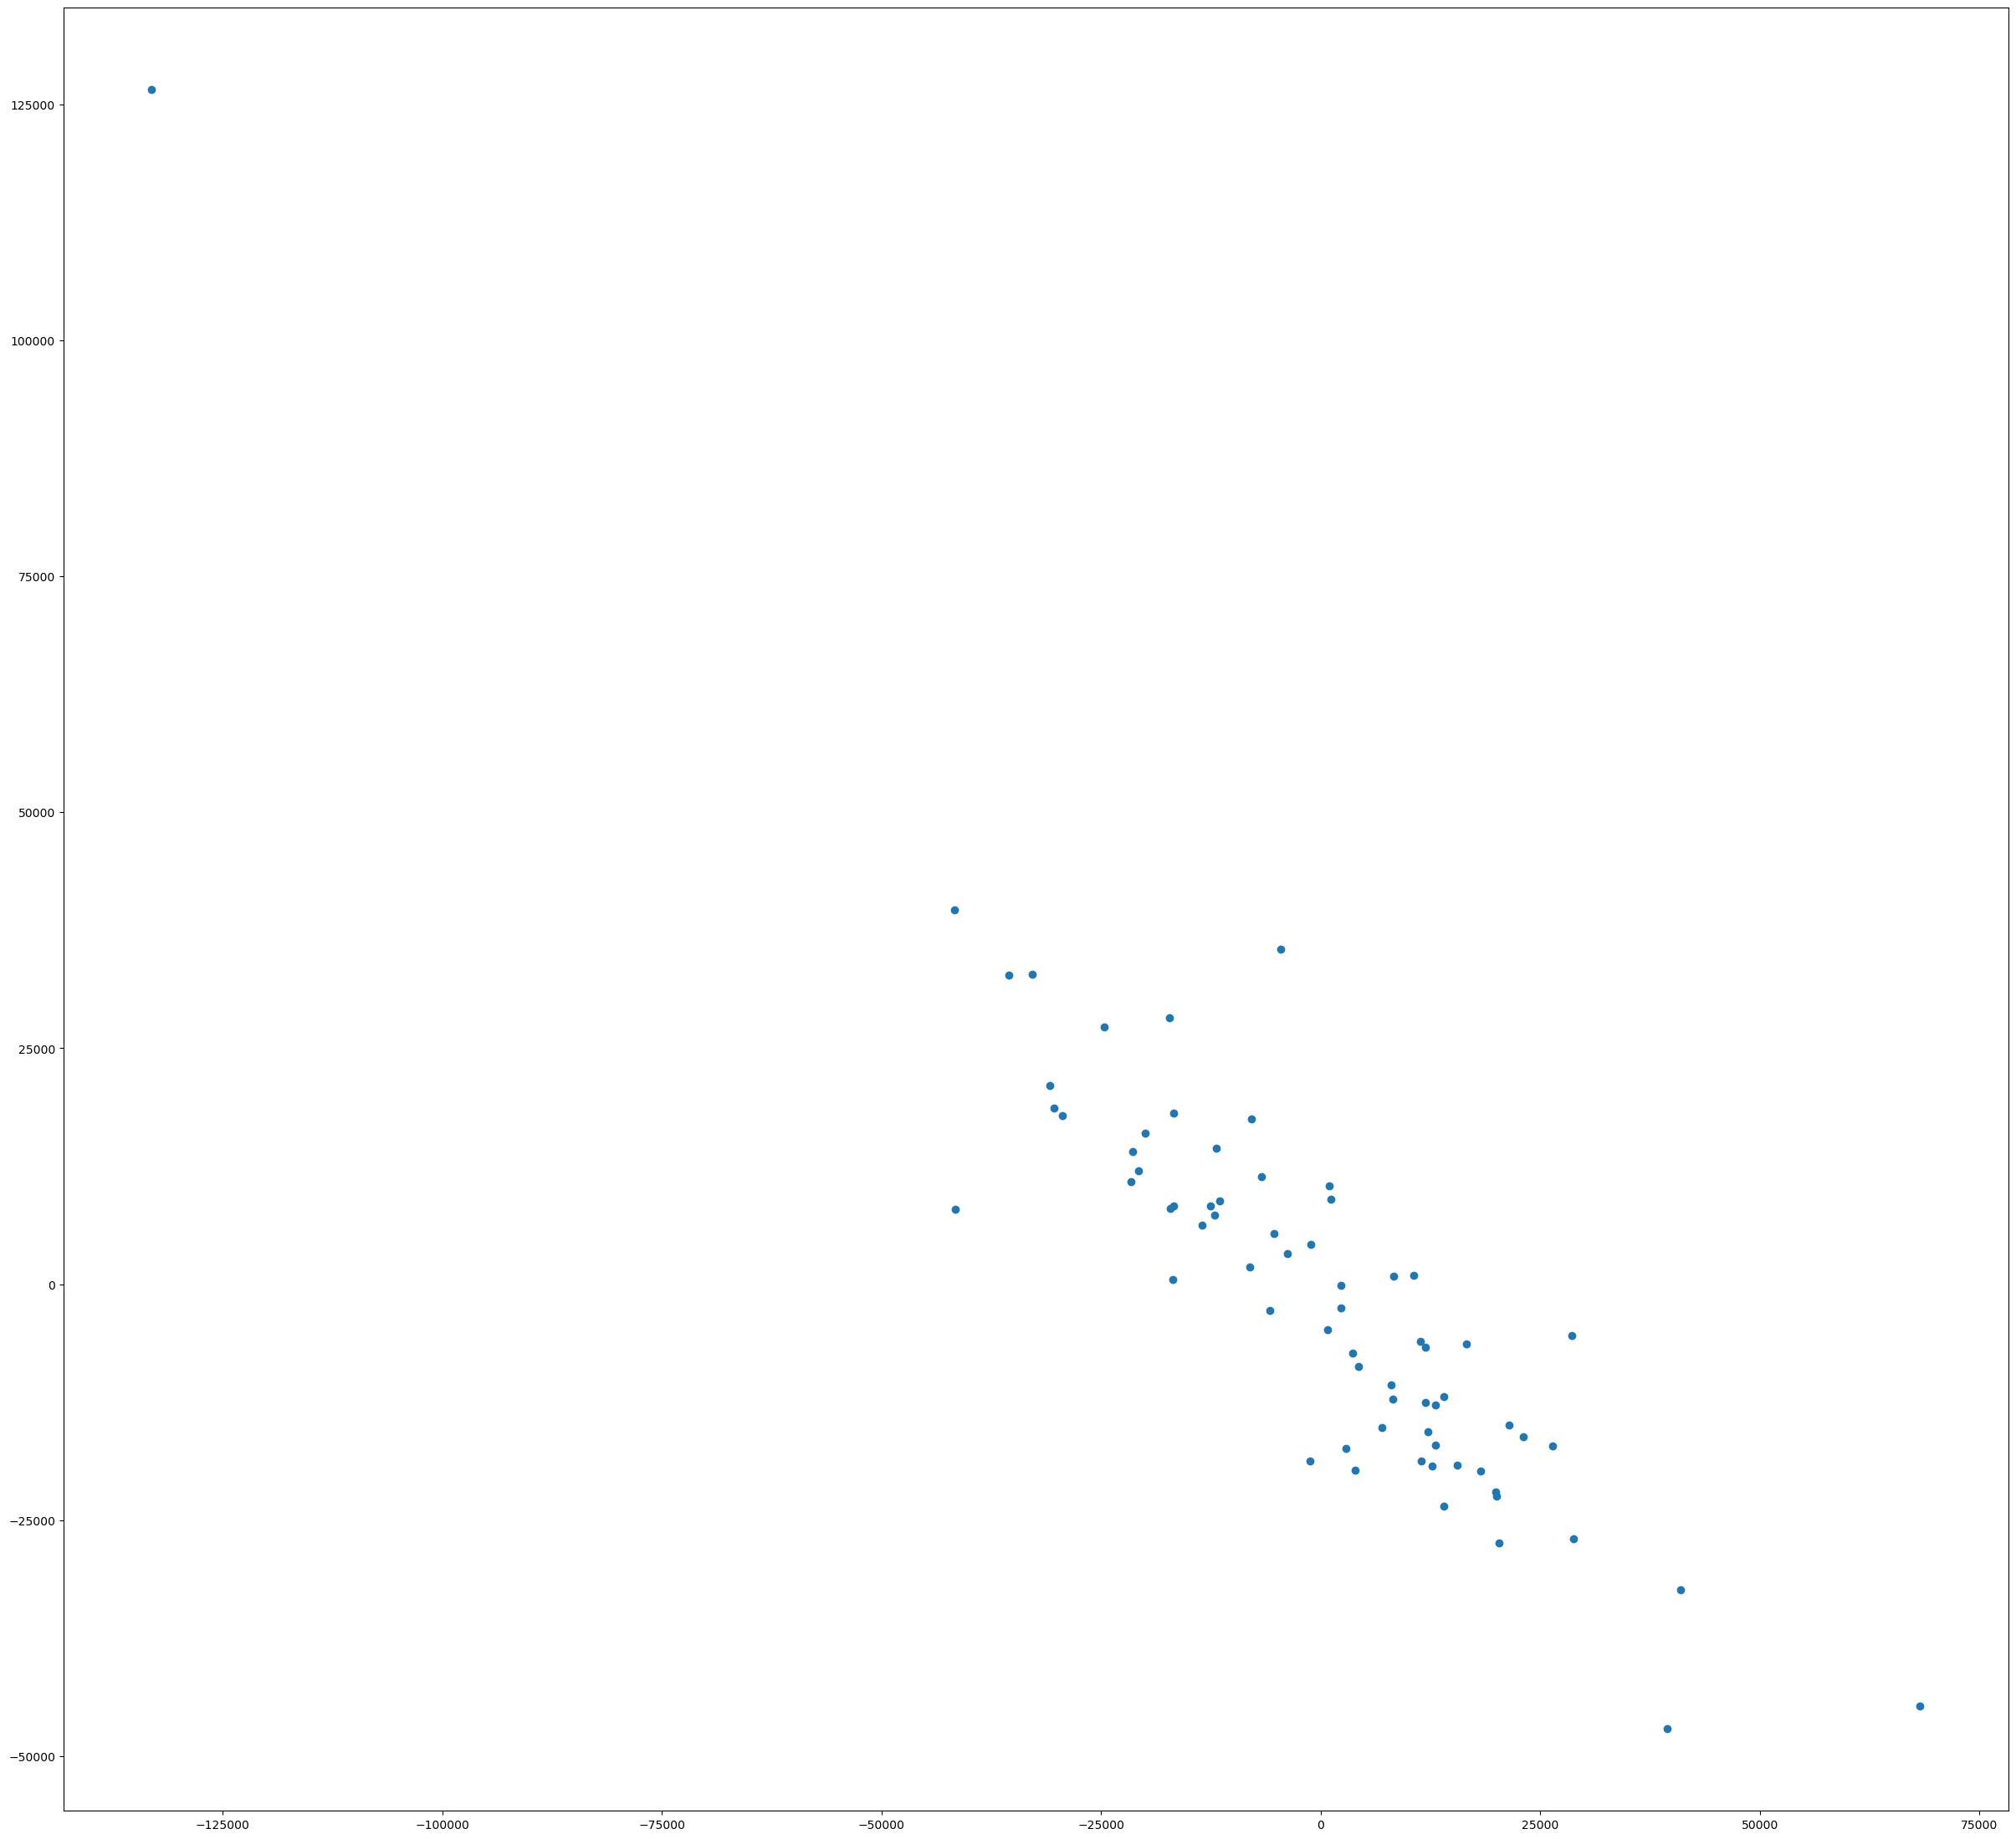

In [141]:
plt.scatter(y_train,res)
plt.show()

In [143]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [144]:
# Making predictions
y_pred = lm.predict(X_test)

In [145]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.07865169218001977

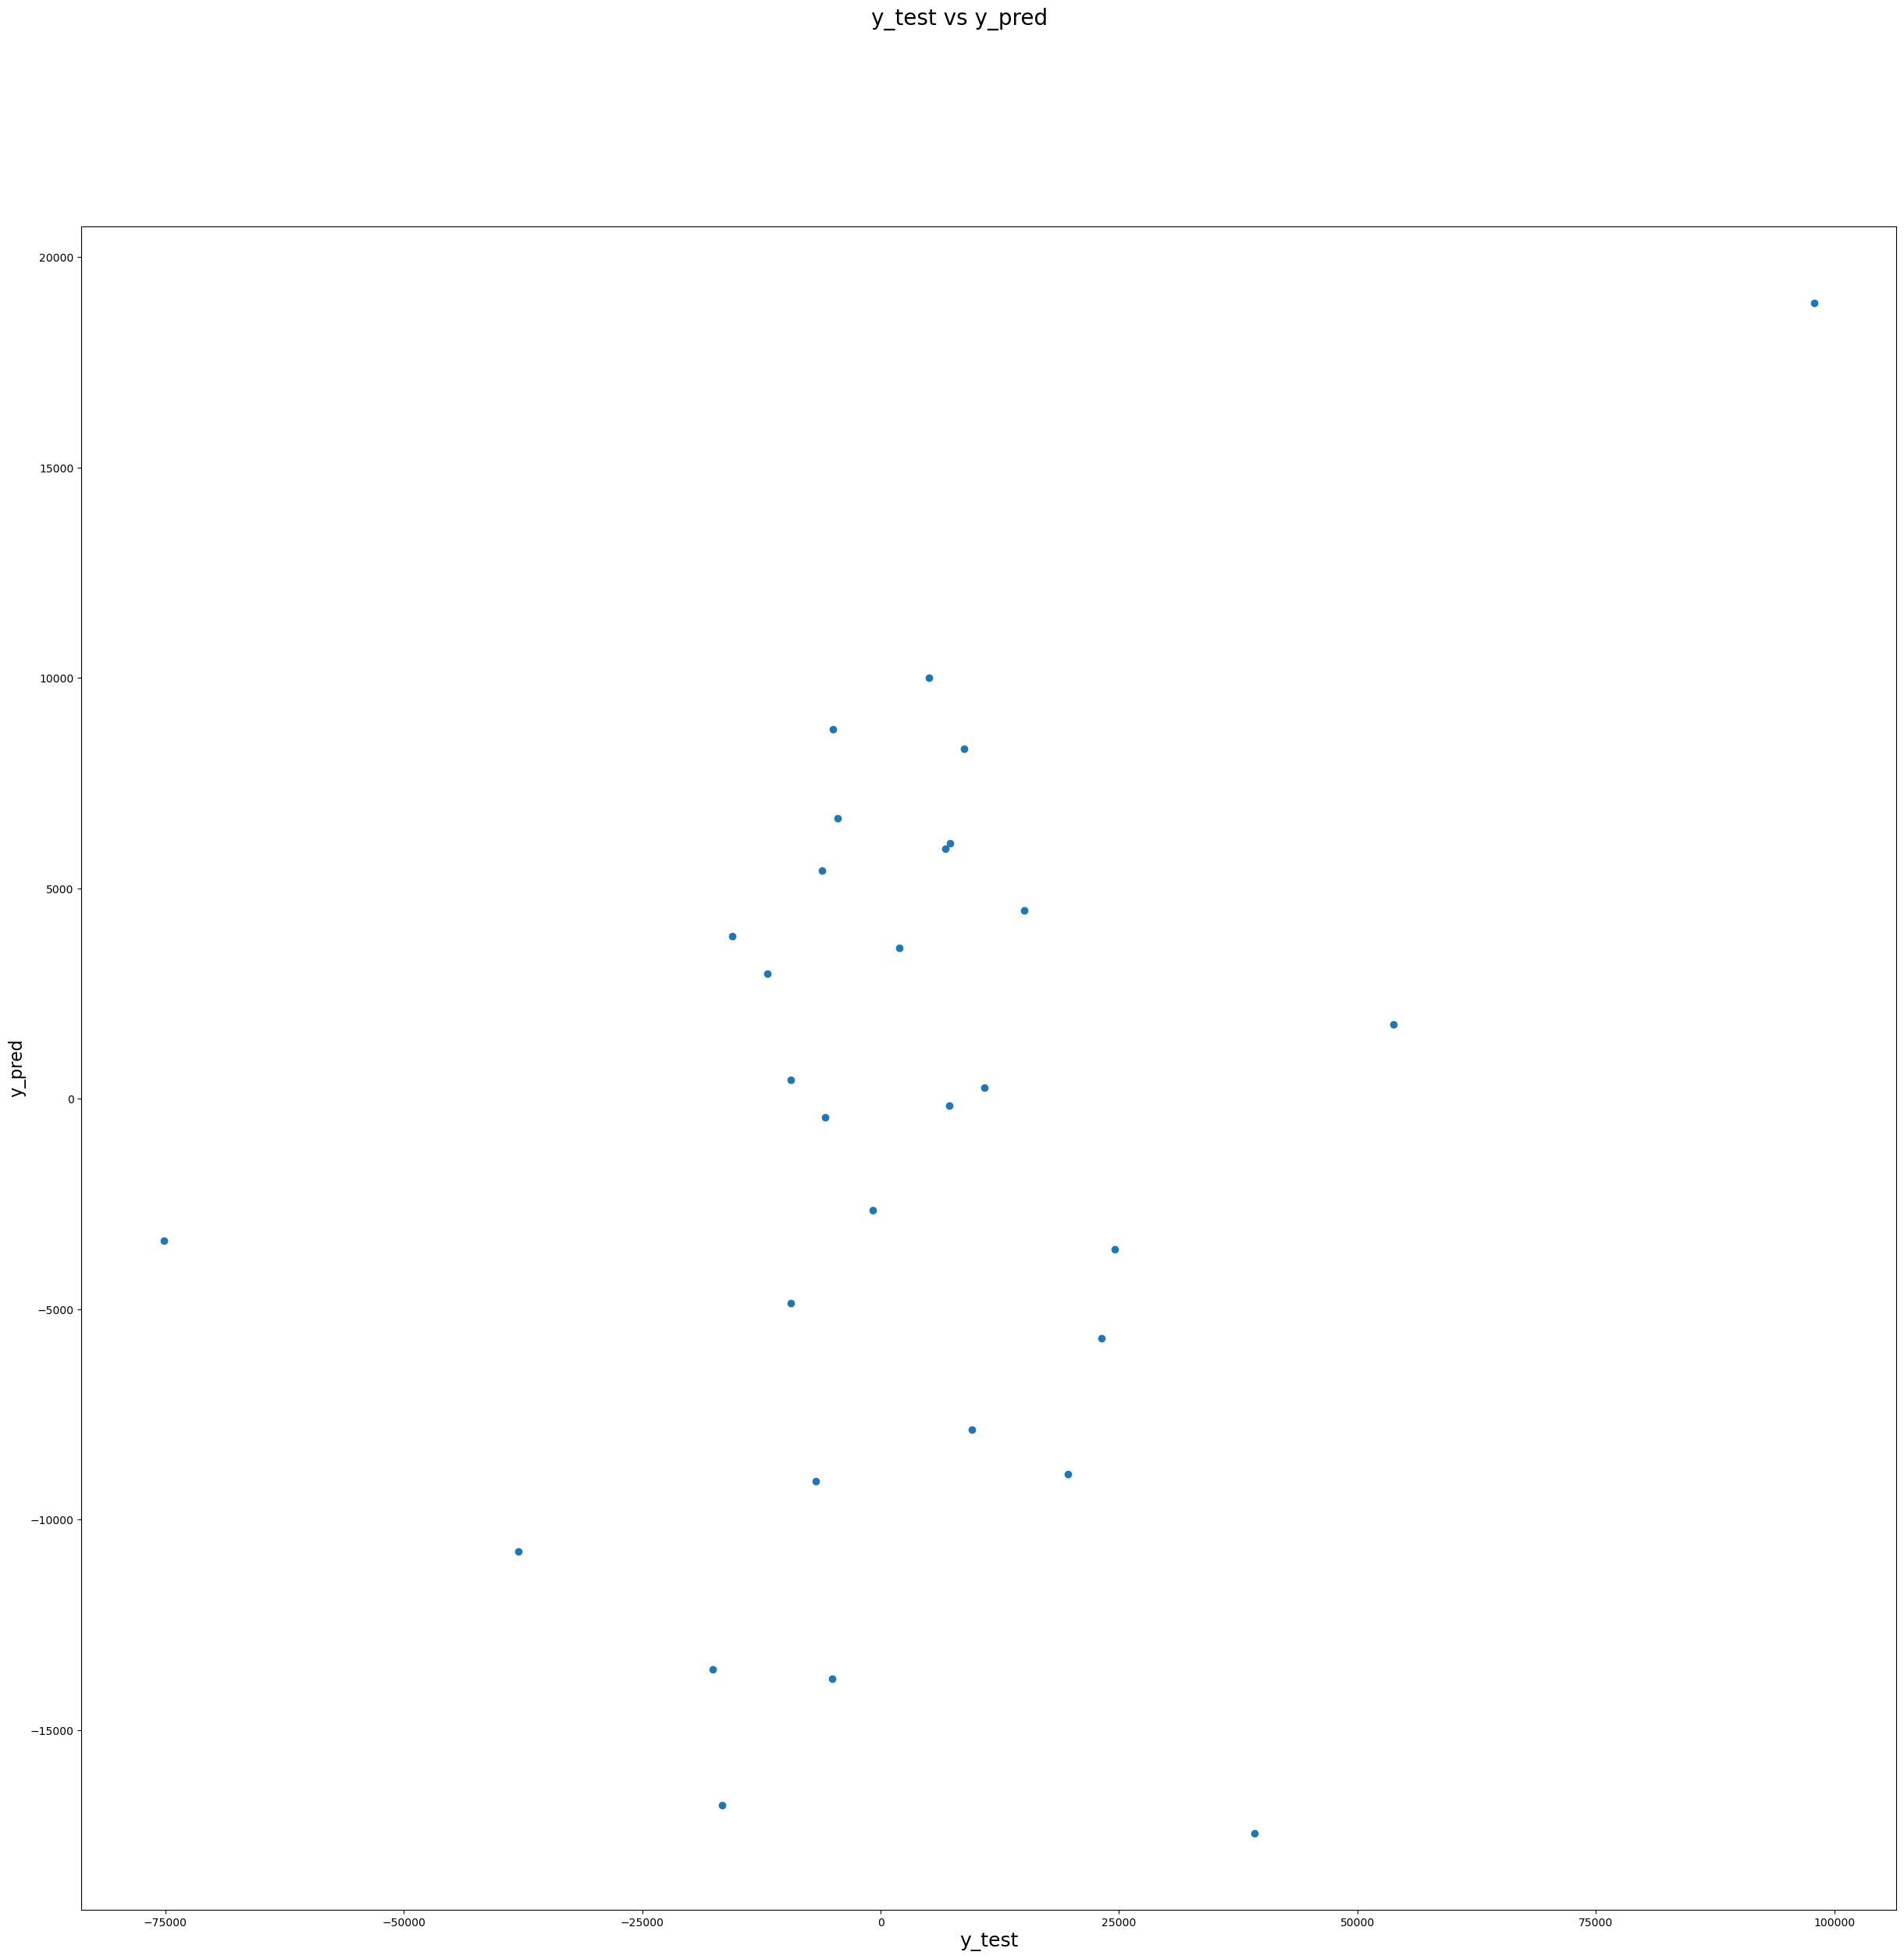

In [147]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

plt.show()